In [1]:
# imports 
import io
import pandas as pd 
import numpy as np
import scipy.stats
import scipy.spatial
import math
import warnings
import time
import cvxpy as cp

#data_rating = pd.read_csv(io.BytesIO(uploaded["ratings.csv"]))
#data_movies = pd.read_csv(io.BytesIO(uploaded["movies.csv"]))
#data_movies = pd.read_csv("Data/ml-latest-small/movies.csv",parse_dates=True) 
data_rating = pd.read_csv("https://raw.githubusercontent.com/g-karou/colab-datasets/master/ratings.csv")
data_movies = pd.read_csv("https://raw.githubusercontent.com/g-karou/colab-datasets/master/movies.csv",error_bad_lines=False)

b'Skipping line 19833: expected 8 fields, saw 10\nSkipping line 34143: expected 8 fields, saw 9\nSkipping line 36015: expected 8 fields, saw 10\nSkipping line 37260: expected 8 fields, saw 12\nSkipping line 44379: expected 8 fields, saw 10\nSkipping line 47551: expected 8 fields, saw 10\n'


In [2]:
data_movies

,movieId,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres
0,1,Toy Story (1995),1995-11-19,John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",114709,862.0,"Adventure,Animation,Children,Comedy,Fantasy"
1,2,Jumanji (1995),1995-12-15,Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",113497,8844.0,"Adventure,Children,Fantasy"
2,3,Grumpier Old Men (1995),1995-01-01,Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",113228,15602.0,"Comedy,Romance"
3,4,Waiting to Exhale (1995),1996-01-15,Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",114885,31357.0,"Comedy,Drama,Romance"
4,5,Father of the Bride Part II (1995),1995-12-08,Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",113041,11862.0,Comedy
5,6,Heat (1995),1995-01-01,Michael Mann,"Robert De Niro, Al Pacino, Val Kilmer, Jon Voi...",113277,949.0,"Action,Crime,Thriller"
6,7,Sabrina (1995),1995-01-01,Sydney Pollack,"Harrison Ford, Greg Kinnear, Nancy Marchand, J...",114319,11860.0,"Comedy,Romance"
7,8,Tom and Huck (1995),1995-12-22,Peter Hewitt,"Jonathan Taylor Thomas, Brad Renfro, Eric Schw...",112302,45325.0,"Adventure,Children"
8,9,Sudden Death (1995),1995-12-22,Peter Hyams,"Raymond J. Barry, Powers Boothe, Jean-Claude V...",114576,9091.0,Action
9,10,GoldenEye (1995),1995-11-17,Martin Campbell,"Pierce Brosnan, Sean Bean, Famke Janssen, Izab...",113189,710.0,"Action,Adventure,Thriller"


**Data pre-processing**

Remove unnecessary columns

In [3]:
#ftiaxnoume ena neo column me to proto genre apo kathe string
# data_movies['category'] = data_movies['genres'].str.split("|", n = 1, expand = True)[0]
data_movies['Category'] = np.random.randint(1, 11, data_movies.shape[0])

In [4]:
joined_datasets = data_rating.set_index('movieId').join(data_movies.set_index('movieId'),how='inner')
joined_datasets['category'] = joined_datasets['genres'].str.split("|", n = 1, expand = True)[0]
data_rating = joined_datasets.reset_index().copy()

In [5]:
data_rating['timestamp']=pd.to_datetime(data_rating['timestamp'])

Remove movies with less than 50 ratings

In [6]:
# Remove movies having been rated less than 50 ratings
grouped_movies = data_rating.groupby('movieId').count()  
grouped_movies = grouped_movies[grouped_movies['userId'] >=50 ]
grouped_movies = grouped_movies.reset_index()

# Reset Index
df = data_rating.set_index('movieId')
df = df.loc[grouped_movies.movieId].reset_index()

In [7]:
grouped_movies

,movieId,userId,rating,timestamp,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres,Category,category
0,1,215,215,215,215,215,215,215,215,215,215,215,215
1,2,110,110,110,110,110,110,110,110,110,110,110,110
2,3,52,52,52,52,52,52,52,52,52,52,52,52
3,6,102,102,102,102,102,102,102,102,102,102,102,102
4,7,54,54,54,54,54,54,54,54,54,54,54,54
5,10,132,132,132,132,132,132,132,132,132,132,132,132
6,11,70,70,70,70,70,70,70,70,70,70,70,70
7,16,82,82,82,82,82,82,82,82,82,82,82,82
8,17,67,67,67,67,67,67,67,67,67,67,67,67
9,19,88,88,88,88,88,88,88,88,88,88,88,88


Remove users with less than 30 ratings

In [8]:
# Remove users having rated less than 30 movies
grouped_users = df.groupby('userId').count()
grouped_users = grouped_users[grouped_users['movieId'] >= 30]
grouped_users = grouped_users.reset_index()

# Reset Index
data_rating = df.set_index('userId')
data_rating = data_rating.loc[grouped_users.userId].reset_index()
df = data_rating

**Collaborative Filtering**

In [9]:
# Rating Matrix (UserId, MovieId)
rating_matrix = df.pivot(index='userId', columns='movieId', values='rating').fillna(0)
rating_matrix

movieId,1,2,3,6,7,10,11,16,17,19,...,91500,91529,96079,99114,106782,109374,109487,112852,116797,122904
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,4.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,5.0,0.0,1.0,0.5,0.5,0.0,0.0,0.0
11,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
np_rating_matrix = rating_matrix.to_numpy()
movies = rating_matrix.shape[1]

In [11]:
np_rating_matrix

array([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [4. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [4. , 0. , 0. , ..., 0. , 0. , 0. ],
       [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 4.5, 0. , 3. ]])

In [12]:
def similarity_item(data):
    
    movie_similarity_pearson = np.zeros((movies,movies))
    movie_similarity_cosine = np.zeros((movies,movies))
    for movie1 in range(movies):
        #print (movie1)
        for movie2 in range(movie1):
            if np.count_nonzero(data[:,movie1]) and np.count_nonzero(data[:,movie2]):
                movie_similarity_cosine[movie1][movie2] = 1-scipy.spatial.distance.cosine(data[:,movie1],data[:,movie2])
                movie_similarity_cosine[movie2][movie1] = 1-scipy.spatial.distance.cosine(data[:,movie2],data[:,movie1])
                try:
                    if not math.isnan(scipy.stats.pearsonr(data[:,movie1],data[:,movie2])[0]):
                        movie_similarity_pearson[movie1][movie2] = scipy.stats.pearsonr(data[:,movie1],data[:,movie2])[0]
                        movie_similarity_pearson[movie2][movie1] = scipy.stats.pearsonr(data[:,movie2],data[:,movie1])[0]
                    else:    
                        movie_similarity_pearson[movie1][movie2] = 0
                        movie_similarity_pearson[movie2][movie1] = 0
                except:
                    movie_similarity_pearson[movie1][movie2] = 0
                    movie_similarity_pearson[movie2][movie1] = 0
    #np.fill_diagonal(movie_similarity_pearson,1)
    return movie_similarity_pearson,movie_similarity_cosine

In [13]:
start_time = time.time()
# Call function for similarity
movie_sim_list,movie_cos_list = similarity_item(np_rating_matrix) # 6 minutes

elapsed_time = time.time() - start_time

print('Elapsed time in minutes:', round(elapsed_time/60,4))

Elapsed time in minutes: 0.368


In [14]:
movies = df['movieId'].unique()
movies.sort(axis=0)

In [15]:
# create a df using pearson correlation matrix
df_item=pd.DataFrame(data=movie_sim_list,    # values
             index=movies,    # 1st column as index
             columns=movies)  # 1st row as the column names

In [16]:
df_item

,1,2,3,6,7,10,11,16,17,19,...,91500,91529,96079,99114,106782,109374,109487,112852,116797,122904
1,0.000000,0.179770,0.112437,0.098310,0.072752,0.167058,0.147498,0.066013,0.129882,0.196285,...,0.056334,0.076570,0.040386,0.039562,0.006780,0.114984,0.091715,0.110371,-0.022704,0.049667
2,0.179770,0.000000,0.179294,0.085122,0.102948,0.235787,0.156321,0.029587,0.059945,0.357226,...,0.143701,0.111911,0.087326,0.078214,0.025219,0.069792,0.124481,0.141484,0.065210,0.149849
3,0.112437,0.179294,0.000000,0.114399,0.364542,0.127868,0.162518,0.201292,0.107414,0.217006,...,-0.068477,-0.074049,-0.037207,-0.076363,-0.038470,-0.050009,-0.073005,-0.048387,-0.066100,-0.028111
6,0.098310,0.085122,0.114399,0.000000,0.089559,0.222340,0.135839,0.397297,0.071550,0.080929,...,-0.016807,0.067020,0.001281,0.004932,-0.011002,0.028740,0.020830,0.008870,-0.024101,0.016538
7,0.072752,0.102948,0.364542,0.089559,0.000000,0.139871,0.360419,-0.006098,0.265248,0.104413,...,0.008571,-0.081594,-0.021974,-0.079650,-0.059315,-0.066161,-0.083763,-0.051638,-0.059983,-0.046048
10,0.167058,0.235787,0.127868,0.222340,0.139871,0.000000,0.199985,0.083894,0.040940,0.268414,...,-0.100388,-0.040532,0.062966,-0.081086,-0.065353,-0.091398,-0.123240,-0.009588,-0.089792,-0.001224
11,0.147498,0.156321,0.162518,0.135839,0.360419,0.199985,0.000000,0.096104,0.314683,0.061964,...,-0.042552,-0.088586,-0.081766,-0.121714,-0.074656,-0.056013,-0.113807,-0.063720,-0.081424,-0.080054
16,0.066013,0.029587,0.201292,0.397297,-0.006098,0.083894,0.096104,0.000000,0.071823,0.112561,...,0.030755,0.123979,0.011258,0.106608,0.092539,0.095243,0.074970,0.064767,0.009538,0.075646
17,0.129882,0.059945,0.107414,0.071550,0.265248,0.040940,0.314683,0.071823,0.000000,0.033050,...,-0.011874,-0.050769,-0.012520,-0.093881,-0.053884,-0.013334,-0.062479,-0.045323,-0.036924,-0.063829
19,0.196285,0.357226,0.217006,0.080929,0.104413,0.268414,0.061964,0.112561,0.033050,0.000000,...,0.175378,0.088223,0.053356,0.116271,0.000723,0.033147,0.139473,0.109197,-0.016911,0.106222


**Rating matrix according to top 20 pearson correlation scores**


In [17]:
has_rating = df.pivot(index='userId', columns='movieId', values='rating')
has_rating
has_rating[~np.isnan(has_rating)] = 1  # fill one if has value
has_rating[np.isnan(has_rating)] = 0  # fill zero if has no value
has_rating

movieId,1,2,3,6,7,10,11,16,17,19,...,91500,91529,96079,99114,106782,109374,109487,112852,116797,122904
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
11,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:

# HasPearson returns coralation for specific movie and user
def hasPearson(userID,movieID):
    return has_rating.loc[userID]*df_item[movieID]

# return the k Nearest Neighbors (i.e. 20 nearest)
def kNNMovies (k, data):
    return data.nlargest(k)

# sum all the top neigbor correlations
def sumCorrel (topPearons):
    return topPearons.sum()


In [19]:
userID = 1
movieID = 2
kNeighbors = 20

def predictMovieRate(userID, movieID, kNeighbors):
    # Step 1: find pearson correlations weahter there is a movie
    has_pearson = has_rating.loc[userID]*df_item[movieID]
    # Step 2: Get the k Nearest Neighbors 
    knn = has_pearson.nlargest(kNeighbors)
    # Step 3: Get the sum of the pearson correlations
    cor_sum = knn.sum()
    # Step 4: Get the only the values
    kNearestNeighbors = knn.values
    # Step 5: Get the ratings 
    get_ratings = rating_matrix[knn.index]
    #return prediction
    return round(np.dot(get_ratings.loc[userID],kNearestNeighbors)/cor_sum,2)


In [20]:
# EXAMPLE FOR A USER AND A MOVIE
predictMovieRate(1,10,20) # user = 1, #movie = 10, k nearest neighbors = 20


3.75

In [21]:
# Predict for all users the 

# starting time
start_time = time.time()

users = rating_matrix.index
rec_matrix = rating_matrix.where(rating_matrix==0) #matrix only for predictions (rated movies replaced by nan)
# create a dictionary for top L recommendations per user
rec_list = dict()
L = 10 # the top-L rated items

for userId in users:
    #print(userId)
    user_movies = rating_matrix.loc[userId]  #get all users movies (rated or not)
    unrated_movies = user_movies.where(user_movies == 0).dropna().index  #get only unrated movies
    for movieId in unrated_movies:
        rec_matrix.loc[userId,movieId] = predictMovieRate(userId,movieId,20)
    
    # The top-L rated items list
    rec_list[userId] = rec_matrix.loc[userId].nlargest(L).index   # Serie of Movies as dictionary values 


elapsed_time = time.time() - start_time
print('Elapsed time in minutes', elapsed_time/60)

#rec_list

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


Elapsed time in minutes 5.9116625666618345


In [22]:
# PRINT THE TABLE WITH THE UNRATED MOVIES (RECOMMENDATIONS)
rec_matrix

movieId,1,2,3,6,7,10,11,16,17,19,...,91500,91529,96079,99114,106782,109374,109487,112852,116797,122904
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.72,NaN,NaN,4.08,3.75,4.01,4.51,4.22,4.09,...,4.68,4.88,4.69,4.63,4.66,4.64,4.80,4.57,4.54,4.60
4,3.73,3.17,3.32,3.39,2.91,3.05,3.11,3.28,3.27,3.10,...,3.24,3.53,3.36,3.02,3.11,3.42,3.18,3.39,3.06,3.14
5,NaN,3.51,3.29,3.46,3.31,3.19,3.28,3.61,3.45,3.45,...,4.01,3.86,3.78,3.89,3.87,4.07,3.67,3.73,3.58,3.55
6,4.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.62,3.42,3.39,3.37,3.68,3.47,3.64,3.72,3.93,3.82
7,NaN,3.52,3.42,3.96,3.55,3.51,3.69,3.25,3.22,3.59,...,3.45,3.51,3.58,3.29,3.52,3.31,3.45,3.65,3.74,3.59
8,3.57,NaN,3.16,3.65,3.51,NaN,NaN,3.72,3.57,3.33,...,3.85,4.14,3.68,4.27,4.01,4.00,4.07,3.86,4.47,3.86
10,3.24,3.28,3.03,2.87,3.21,3.58,3.16,2.93,3.14,3.24,...,3.26,NaN,NaN,3.06,NaN,NaN,NaN,3.31,3.20,3.27
11,4.01,3.53,3.55,NaN,3.70,NaN,3.94,4.01,4.02,3.53,...,4.21,4.37,3.98,4.13,4.34,4.21,4.30,4.04,4.27,4.11
14,2.83,2.96,3.04,3.70,NaN,3.11,3.62,3.59,3.86,NaN,...,2.33,2.80,2.41,2.92,3.25,3.57,2.96,2.34,3.49,2.27


## Step 4: Computation of the similarity user-user (Cosine, Jaccard, Pearson)

In [23]:
users = rating_matrix.shape[0]

# Similarity function for pair of users
def similarity_user(data):
    user_similarity_cosine = np.zeros((users,users))
    user_similarity_jaccard = np.zeros((users,users))
    user_similarity_pearson = np.zeros((users,users))
    for user1 in range(users):
        for user2 in range(users):
            if np.count_nonzero(data[user1]) and np.count_nonzero(data[user2]):
                user_similarity_cosine[user1][user2] = 1-scipy.spatial.distance.cosine(data[user1],data[user2])
                user_similarity_jaccard[user1][user2] = 1-scipy.spatial.distance.jaccard(data[user1],data[user2])
                try:
                    if not math.isnan(scipy.stats.pearsonr(data[user1],data[user2])[0]):
                        user_similarity_pearson[user1][user2] = scipy.stats.pearsonr(data[user1],data[user2])[0]
                    else:
                        user_similarity_pearson[user1][user2] = 0
                except:
                    user_similarity_pearson[user1][user2] = 0
    return user_similarity_cosine, user_similarity_jaccard, user_similarity_pearson
        
    

In [24]:
start_time = time.time()
# Call function for similarity
user_sim_list = similarity_user(np_rating_matrix) # 6 minutes

elapsed_time = time.time() - start_time

print('Elapsed time in minutes:', round(elapsed_time/60,4))

Elapsed time in minutes: 0.4282


In [25]:
# DataFrame for cosine Similirity (User-User)
user_cor_cosine=pd.DataFrame(data=user_sim_list[0],    # values
             index=df['userId'].unique(),    # 1st column as index
             columns=df['userId'].unique())  # 1st row as the column names

# DataFrame for jaccard Similirity (User-User)
user_cor_jaccard=pd.DataFrame(data=user_sim_list[1],    # values
             index=df['userId'].unique(),    # 1st column as index
             columns=df['userId'].unique())  # 1st row as the column names


# DataFrame for Pearson Similirity (User-User)
user_cor_pearson=pd.DataFrame(data=user_sim_list[2],    # values
             index=df['userId'].unique(),    # 1st column as index
             columns=df['userId'].unique())  # 1st row as the column names


In [26]:
user_cor_cosine

,1,4,5,6,7,8,10,11,14,15,...,600,601,602,603,604,605,606,607,608,610
1,1.000000,0.391473,0.213732,0.243745,0.266302,0.199144,0.042685,0.211571,0.184320,0.282165,...,0.491186,0.130953,0.260761,0.502683,0.125058,0.261866,0.405731,0.420593,0.487244,0.356205
4,0.391473,1.000000,0.122898,0.147130,0.195249,0.106226,0.076110,0.102715,0.080091,0.125731,...,0.407650,0.155279,0.157900,0.489075,0.096592,0.183012,0.358283,0.251111,0.341697,0.270365
5,0.213732,0.122898,1.000000,0.505500,0.132904,0.523611,0.064988,0.260332,0.302895,0.164499,...,0.229157,0.092847,0.547331,0.194253,0.370230,0.275596,0.181591,0.245169,0.244553,0.147607
6,0.243745,0.147130,0.505500,1.000000,0.151140,0.591826,0.061252,0.420271,0.531455,0.132602,...,0.350209,0.041355,0.729276,0.227686,0.559406,0.228154,0.215651,0.297450,0.341310,0.156325
7,0.266302,0.195249,0.132904,0.151140,1.000000,0.142037,0.272609,0.279352,0.103443,0.348706,...,0.395100,0.269164,0.182815,0.234815,0.102368,0.389576,0.442109,0.290752,0.503223,0.402226
8,0.199144,0.106226,0.523611,0.591826,0.142037,1.000000,0.044581,0.292679,0.487035,0.134829,...,0.276602,0.096091,0.678611,0.228314,0.445156,0.195904,0.203346,0.260732,0.295263,0.166626
10,0.042685,0.076110,0.064988,0.061252,0.272609,0.044581,1.000000,0.059024,0.056736,0.241708,...,0.215179,0.340919,0.029326,0.098380,0.028863,0.213443,0.230453,0.025605,0.189258,0.319594
11,0.211571,0.102715,0.260332,0.420271,0.279352,0.292679,0.059024,1.000000,0.274896,0.135042,...,0.223168,0.116338,0.443942,0.174365,0.199255,0.200654,0.178120,0.397858,0.269471,0.196828
14,0.184320,0.080091,0.302895,0.531455,0.103443,0.487035,0.056736,0.274896,1.000000,0.112738,...,0.230500,0.061084,0.554366,0.206053,0.353734,0.138551,0.222751,0.242765,0.221446,0.155788
15,0.282165,0.125731,0.164499,0.132602,0.348706,0.134829,0.241708,0.135042,0.112738,1.000000,...,0.392418,0.431329,0.173354,0.270201,0.074105,0.262498,0.444893,0.269357,0.421774,0.484419


In [27]:
user_cor_jaccard

,1,4,5,6,7,8,10,11,14,15,...,600,601,602,603,604,605,606,607,608,610
1,1.000000,0.110429,0.036232,0.032787,0.027322,0.027586,0.000000,0.027972,0.035971,0.045714,...,0.027491,0.033333,0.068571,0.098214,0.006329,0.036585,0.038462,0.094675,0.046012,0.056667
4,0.110429,1.000000,0.009009,0.018634,0.018987,0.000000,0.016667,0.025424,0.000000,0.012987,...,0.035336,0.013889,0.039474,0.077670,0.015625,0.041667,0.055556,0.037736,0.030211,0.017544
5,0.036232,0.009009,1.000000,0.125000,0.008475,0.103448,0.013333,0.046154,0.053571,0.018519,...,0.011236,0.019231,0.045455,0.034826,0.072464,0.032258,0.007812,0.042017,0.022293,0.019231
6,0.032787,0.018634,0.125000,1.000000,0.017544,0.125000,0.000000,0.100917,0.104167,0.018405,...,0.024221,0.012270,0.150943,0.041494,0.115385,0.020548,0.023810,0.072727,0.039514,0.012987
7,0.027322,0.018987,0.008475,0.017544,1.000000,0.007874,0.016949,0.051282,0.000000,0.054422,...,0.028169,0.034722,0.024691,0.008264,0.029197,0.022388,0.045802,0.048193,0.069401,0.052239
8,0.027586,0.000000,0.103448,0.125000,0.007874,1.000000,0.000000,0.028169,0.105263,0.025210,...,0.026119,0.035398,0.178571,0.029268,0.135135,0.038835,0.007692,0.039370,0.028754,0.011278
10,0.000000,0.016667,0.013333,0.000000,0.016949,0.000000,1.000000,0.000000,0.000000,0.009434,...,0.000000,0.020619,0.000000,0.004630,0.000000,0.009524,0.003922,0.000000,0.015152,0.016194
11,0.027972,0.025424,0.046154,0.100917,0.051282,0.028169,0.000000,1.000000,0.030303,0.008547,...,0.003690,0.018349,0.111111,0.019231,0.036145,0.009709,0.000000,0.110169,0.012658,0.011450
14,0.035971,0.000000,0.053571,0.104167,0.000000,0.105263,0.000000,0.030303,1.000000,0.000000,...,0.018657,0.000000,0.081395,0.034653,0.084507,0.010101,0.019920,0.033058,0.012698,0.007752
15,0.045714,0.012987,0.018519,0.018405,0.054422,0.025210,0.009434,0.008547,0.000000,1.000000,...,0.013986,0.041667,0.032680,0.012712,0.015748,0.037037,0.030651,0.031250,0.015106,0.043651


In [28]:
user_cor_pearson

,1,4,5,6,7,8,10,11,14,15,...,600,601,602,603,604,605,606,607,608,610
1,1.000000,0.238971,0.096821,0.027975,0.065004,0.059860,-0.121533,0.076933,0.061545,0.097805,...,0.216780,-0.090587,0.068375,0.286296,-0.050776,0.082144,0.077764,0.248768,0.167143,-0.009339
4,0.238971,1.000000,0.018433,-0.037615,0.027164,-0.015816,-0.044287,-0.018221,-0.030066,-0.046168,...,0.185942,-0.008553,-0.009543,0.335522,-0.042699,0.030248,0.110396,0.082720,0.038363,-0.031010
5,0.096821,0.018433,1.000000,0.449113,0.022191,0.483117,-0.011442,0.197870,0.250355,0.064170,...,0.058215,-0.015781,0.498784,0.042809,0.310499,0.193859,-0.010954,0.144966,0.058090,-0.064341
6,0.027975,-0.037615,0.449113,1.000000,-0.047477,0.537333,-0.075488,0.338383,0.479118,-0.058249,...,0.052644,-0.166782,0.669495,-0.059122,0.487919,0.066970,-0.158969,0.120050,-0.018957,-0.260247
7,0.065004,0.027164,0.022191,-0.047477,1.000000,0.016436,0.173451,0.177209,-0.011631,0.210606,...,0.138490,0.116310,0.007472,-0.037691,-0.046691,0.266776,0.214770,0.118244,0.295866,0.148827
8,0.059860,-0.015816,0.483117,0.537333,0.016436,1.000000,-0.044258,0.224597,0.443382,0.015190,...,0.094222,-0.027610,0.639040,0.061408,0.384614,0.090301,-0.014094,0.146882,0.100545,-0.072503
10,-0.121533,-0.044287,-0.011442,-0.075488,0.173451,-0.044258,1.000000,-0.027362,-0.020371,0.143160,...,0.015357,0.257474,-0.101001,-0.099819,-0.072677,0.115421,0.039782,-0.122643,-0.065113,0.171509
11,0.076933,-0.018221,0.197870,0.338383,0.177209,0.224597,-0.027362,1.000000,0.213674,0.017032,...,0.017513,-0.002832,0.370482,-0.007135,0.112724,0.097137,-0.048088,0.309821,0.060633,-0.023118
14,0.061545,-0.030066,0.250355,0.479118,-0.011631,0.443382,-0.020371,0.213674,1.000000,0.005380,...,0.060215,-0.051778,0.506790,0.058255,0.292369,0.039443,0.049998,0.142165,0.018541,-0.052114
15,0.097805,-0.046168,0.064170,-0.058249,0.210606,0.015190,0.143160,0.017032,0.005380,1.000000,...,0.156579,0.319341,0.006439,0.029390,-0.070907,0.122505,0.240344,0.102473,0.175755,0.300931


In [29]:
rec_matrix

movieId,1,2,3,6,7,10,11,16,17,19,...,91500,91529,96079,99114,106782,109374,109487,112852,116797,122904
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.72,NaN,NaN,4.08,3.75,4.01,4.51,4.22,4.09,...,4.68,4.88,4.69,4.63,4.66,4.64,4.80,4.57,4.54,4.60
4,3.73,3.17,3.32,3.39,2.91,3.05,3.11,3.28,3.27,3.10,...,3.24,3.53,3.36,3.02,3.11,3.42,3.18,3.39,3.06,3.14
5,NaN,3.51,3.29,3.46,3.31,3.19,3.28,3.61,3.45,3.45,...,4.01,3.86,3.78,3.89,3.87,4.07,3.67,3.73,3.58,3.55
6,4.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.62,3.42,3.39,3.37,3.68,3.47,3.64,3.72,3.93,3.82
7,NaN,3.52,3.42,3.96,3.55,3.51,3.69,3.25,3.22,3.59,...,3.45,3.51,3.58,3.29,3.52,3.31,3.45,3.65,3.74,3.59
8,3.57,NaN,3.16,3.65,3.51,NaN,NaN,3.72,3.57,3.33,...,3.85,4.14,3.68,4.27,4.01,4.00,4.07,3.86,4.47,3.86
10,3.24,3.28,3.03,2.87,3.21,3.58,3.16,2.93,3.14,3.24,...,3.26,NaN,NaN,3.06,NaN,NaN,NaN,3.31,3.20,3.27
11,4.01,3.53,3.55,NaN,3.70,NaN,3.94,4.01,4.02,3.53,...,4.21,4.37,3.98,4.13,4.34,4.21,4.30,4.04,4.27,4.11
14,2.83,2.96,3.04,3.70,NaN,3.11,3.62,3.59,3.86,NaN,...,2.33,2.80,2.41,2.92,3.25,3.57,2.96,2.34,3.49,2.27


In [30]:
# data_rating
# data_rating['category_uniq'] = data_rating['category'].apply(lambda s:s.split(',', 1)[0])
uniq_categories = list(data_rating['Category'].unique())
uniq_categories

[9, 8, 6, 10, 7, 3, 4, 5, 1, 2]

In [31]:
# create categoriesIndex a filter vector for each category 
# each position in the vector represents a movie
categoriesIndex = []
for category in uniq_categories:
    category_specific_index = np.zeros(450)
    filtered_df = data_rating[(data_rating['Category'] == category)]
    movieIds = filtered_df.movieId.unique().tolist()
    for movieId in movieIds:
        indexPosition = rec_matrix.columns.get_loc(movieId)
        category_specific_index[indexPosition] = 1
    categoriesIndex.append(category_specific_index)

In [32]:
def runOptimization(temp,L, D , K ,integerOnly,useGUROBI):
    U = temp.shape[0]
    I= temp.shape[1]
    np_rec_matrix=temp.copy().to_numpy()
    X = cp.Variable((U,I),integer=integerOnly)
    objective=cp.Maximize(1/(L*U) *cp.sum(cp.multiply(np_rec_matrix,X)))
    constraints = [0 <= X, X <= 1]
    constraints += [cp.sum(X, axis=1) == L]
    dis= 1-np.abs(user_cor_pearson.copy().to_numpy())

    for ci in range(len(uniq_categories)):
        nevermind = categoriesIndex[ci][:I]
        category_indexes = np.repeat(np.array([nevermind]), U, axis=0)
        ic=np.count_nonzero(nevermind)
#         print('Category: {} , Count: {}'.format(ci,ic))
        constraints += [cp.sum(cp.multiply(category_indexes,X))>=K*ic]
#         constraints += [cp.norm(cp.multiply(nevermind,X[0,:])-cp.multiply(nevermind,X[3,:]))<= D/dis[0,3]]

    constraints += [cp.norm(X[0,:]-X[3,:])<=D/dis[0,3]]

    prob = cp.Problem(objective, constraints)
    if(useGUROBI):
         result = prob.solve(solver=cp.GUROBI, verbose=False)
    else:
        result = prob.solve(verbose=False)
    return X

In [33]:
L = 10 # 5,10
D = 0.1 # 0 - 2 is ignored for now
K = 0.01 # 0.01 - 0.15 

In [34]:
rec_matrix_copy2 = rec_matrix.copy().fillna(0)
rec_matrix_copy2.shape

(387, 450)

### 4.1 a

In [35]:
result_continuous= runOptimization(rec_matrix_copy2,L,D,K,False,False)
# print(result_continuous[0].value)

### 4.1 b

In [36]:
try:
    result_discrete= runOptimization(rec_matrix_copy2,L,D,K,False,True)
#     print(result_discrete[0].value)
#     print(np.nonzero(result_discrete[1].value))
except:
    print("An exception occurred")

Using license file /Users/georgekaroulas/gurobi.lic
Academic license - for non-commercial use only


### Baseline Recommendation

In [37]:
user_id = 6
rec_list_baseline = rec_matrix_copy2.loc[user_id]
df_rec_list_baseline=pd.DataFrame(data=rec_list_baseline)  # 1st row as the column names
df_rec_list_baseline=df_rec_list_baseline.rename(columns={user_id: "Rating"})
df_rec_list_baseline=df_rec_list_baseline.reset_index()
df_top_rec_baseline = data_movies.set_index('movieId').join(df_rec_list_baseline.set_index('movieId'),how='inner')
df_top_rec_baseline=df_top_rec_baseline.reset_index()
df_top_rec_baseline[['movieId','title','Category','Rating']].sort_values('Rating',ascending=False).head(L)
result_data = df_top_rec_baseline[['movieId','title','Category','Rating']].sort_values('Rating',ascending=False).head(L)
print('userId   >.  ',userId)
print(result_data['Rating'].mean())
result_data

userId   >.   610
4.188999999999999


,movieId,title,Category,Rating
210,1721,Titanic (1997),4,4.33
129,1035,"Sound of Music, The (1965)",8,4.26
116,786,Eraser (1996),9,4.25
110,733,"Rock, The (1996)",2,4.20
94,586,Home Alone (1990),6,4.19
137,1101,Top Gun (1986),8,4.16
197,1580,Men in Black (a.k.a. MIB) (1997),10,4.16
314,4022,Cast Away (2000),6,4.14
106,648,Mission: Impossible (1996),10,4.12
17,48,Pocahontas (1995),7,4.08


### Recommendation using Coverage and L constraint for Continuous variables

In [38]:
df_categories = pd.DataFrame(data=0,
                          index=uniq_categories,
                          columns=rec_matrix_copy2.index)
df_categories_baseline = pd.DataFrame(data=0,
                          index=uniq_categories,
                          columns=rec_matrix_copy2.index)

In [39]:
def makeMoviesDf(inputData,rec_matrix_copy23,user_id,LL):
    ##make Baseline
    rec_list_baseline = rec_matrix_copy23.loc[user_id]
    df_rec_list_baseline=pd.DataFrame(data=rec_list_baseline)  # 1st row as the column names
    df_rec_list_baseline=df_rec_list_baseline.rename(columns={user_id: "Rating"})
    df_rec_list_baseline=df_rec_list_baseline.reset_index()
    df_top_rec_baseline = data_movies.set_index('movieId').join(df_rec_list_baseline.set_index('movieId'),how='inner')
    df_top_rec_baseline=df_top_rec_baseline.reset_index()
    df_top_rec_baseline=df_top_rec_baseline[['movieId','title','Category','Rating']].sort_values('Rating',ascending=False).head(LL)
#     result_data = df_top_rec_baseline[['movieId','title','Category','Rating']].sort_values('Rating',ascending=False).head(L)
    ##make New
    top_rec_list = inputData.loc[user_id].sort_values(ascending=False).head(LL)
    df_top_rec_list=pd.DataFrame(data=top_rec_list)  # 1st row as the column names
    df_top_rec_list=df_top_rec_list.rename(columns={user_id: "Opt Value"})
    df_top_rec_list=df_top_rec_list.reset_index()
    df_top_rec_list = data_movies.set_index('movieId').join(df_top_rec_list.set_index('movieId'),how='inner')
    df_top_rec_list=df_top_rec_list.reset_index()
    #join me to baseline gia na fero ta ratings
    df_top_rec_list = df_top_rec_list.set_index('movieId').join(df_rec_list_baseline.set_index('movieId'),how='inner')
    df_top_rec_list=df_top_rec_list.reset_index()
    for c in uniq_categories:
        df_categories[user_id][c] = np.sum(df_top_rec_list['Category']==c)
        df_categories_baseline[user_id][c] = np.sum(df_top_rec_baseline['Category']==c)
    return df_top_rec_list[['movieId','title','Category','Rating']].sort_values('Rating',ascending=False),df_top_rec_baseline

In [40]:
user_id = 6
new_rec_matrix_continuous = pd.DataFrame(data=result_continuous.value,
                  index=rec_matrix_copy2.index,
                  columns=rec_matrix_copy2.columns)

result_data,true = makeMoviesDf(new_rec_matrix_continuous,rec_matrix_copy2,user_id,L)
print(result_data['Rating'].mean())
result_data

4.046


,movieId,title,Category,Rating
2,1721,Titanic (1997),4,4.33
0,1035,"Sound of Music, The (1965)",8,4.26
1,1101,Top Gun (1986),8,4.16
3,4022,Cast Away (2000),6,4.14
5,4995,"Beautiful Mind, A (2001)",5,4.02
4,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,2,3.97
8,6942,Love Actually (2003),9,3.93
7,6377,Finding Nemo (2003),5,3.92
9,76093,How to Train Your Dragon (2010),8,3.91
6,5989,Catch Me If You Can (2002),4,3.82


### Recommendation using Coverage and L constraint for Discrete variables

In [41]:
new_rec_matrix_discrete = pd.DataFrame(data=result_discrete.value,
                  index=rec_matrix_copy2.index,
                  columns=rec_matrix_copy2.columns)
result_data,smth = makeMoviesDf(new_rec_matrix_discrete,rec_matrix_copy2,user_id,L)
print(result_data['Rating'].mean())
result_data

4.046


,movieId,title,Category,Rating
2,1721,Titanic (1997),4,4.33
0,1035,"Sound of Music, The (1965)",8,4.26
1,1101,Top Gun (1986),8,4.16
3,4022,Cast Away (2000),6,4.14
5,4995,"Beautiful Mind, A (2001)",5,4.02
4,4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,2,3.97
8,6942,Love Actually (2003),9,3.93
7,6377,Finding Nemo (2003),5,3.92
9,76093,How to Train Your Dragon (2010),8,3.91
6,5989,Catch Me If You Can (2002),4,3.82


### 6. Plots 

In [42]:
def plot_coverage(df):
    # plot_coverage(df)
    y_pos = np.arange(len(df["D_K"]))
    plt.figure(figsize=(15,5))
    # Create bars
    plt.bar(np.arange(len(df["D_K"])), df['Average_Rating'])

    # Create names on the x-axis
    plt.xticks(y_pos, df["D_K"])
    axes = plt.axes()
    axes.set_ylim([4.0, 4.25])

    plt.xlabel('D,K values')
    plt.ylabel('Average Rating')
    plt.title('Analysis for Diversity & Coverage')

    plt.show()

In [43]:
import math
import numpy as np
import matplotlib.pyplot as plt
# K = [0.005 ,0.01,0.03, 0.05, 0.07, 0.10, 0.15, 0.20, 0.3, 0.4]
# K = [0.01]
# # D=[0.1,0.2,0.4,0.6,0.72,0.8]
# # D=[0.0001,0.1,0.2,0.4,0.5,0.6,0.72,0.8,1]
# D=[0.31]

def calculateForAnyK(D,K,rec_matrix_copy22,LLL,isDis,isGuro):
    df = pd.DataFrame(columns=['D_K','D','K','Average_Rating'])
    for d in D:
        for k in K:
            print(' Running for d : {},  and k : {}'.format(d,k))
            # we add an exception handler for not suitable k values
            try:
                result= runOptimization(rec_matrix_copy22,LLL,d,k,isDis,isGuro) 
                averageRating= 0
                count=0

                a_new_rec_matrix = pd.DataFrame(data=result.value,
                              index=rec_matrix_copy22.index,
                              columns=rec_matrix_copy22.columns)

                userId =6
                result_data,result_baseline = makeMoviesDf(a_new_rec_matrix.copy(),rec_matrix_copy22,userId,LLL)
                #if(result_data['Rating'].mean()!=result_baseline['Rating'].mean()):
                                    #print(result_data)

                mean=result_data['Rating'].mean()
                if(math.isnan(mean)):
                    a=1
                else:
                    ## does not apply for a single user
                    count+=1
                    averageRating+=mean
                df = df.append({'D_K': 'D:'+str(d)+', K:'+str(k),'K':k,'D':d,'Average_Rating': averageRating/count}, ignore_index=True)
            except:
                print("An exception occurred")
                df = df.append({'D_K': 'D:'+str(d)+', K:'+str(k),'K':k,'D':d,'Average_Rating': 0}, ignore_index=True)
    return df


### L=5, different D,K values , continuous values, default cvxpy solver

In [44]:
D= [0.1,0.6,0.8,1.2,1.6,2,2.4,2.8]

 Running for d : 0.1,  and k : 0.01
 Running for d : 0.6,  and k : 0.01
 Running for d : 0.8,  and k : 0.01
 Running for d : 1.2,  and k : 0.01
 Running for d : 1.6,  and k : 0.01
 Running for d : 2,  and k : 0.01
 Running for d : 2.4,  and k : 0.01
 Running for d : 2.8,  and k : 0.01


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


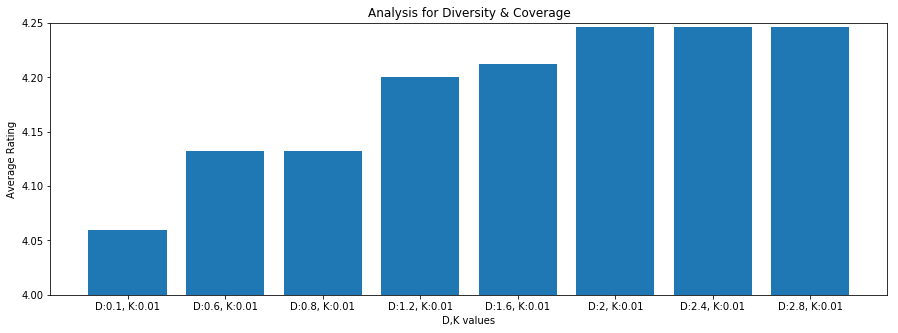

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.01",0.1,0.01,4.060
1,"D:0.6, K:0.01",0.6,0.01,4.132
2,"D:0.8, K:0.01",0.8,0.01,4.132
3,"D:1.2, K:0.01",1.2,0.01,4.200
4,"D:1.6, K:0.01",1.6,0.01,4.212
5,"D:2, K:0.01",2.0,0.01,4.246
6,"D:2.4, K:0.01",2.4,0.01,4.246
7,"D:2.8, K:0.01",2.8,0.01,4.246


In [45]:
K = [0.01]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,False,False)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.03
 Running for d : 0.6,  and k : 0.03
 Running for d : 0.8,  and k : 0.03
 Running for d : 1.2,  and k : 0.03
 Running for d : 1.6,  and k : 0.03
 Running for d : 2,  and k : 0.03
 Running for d : 2.4,  and k : 0.03
 Running for d : 2.8,  and k : 0.03


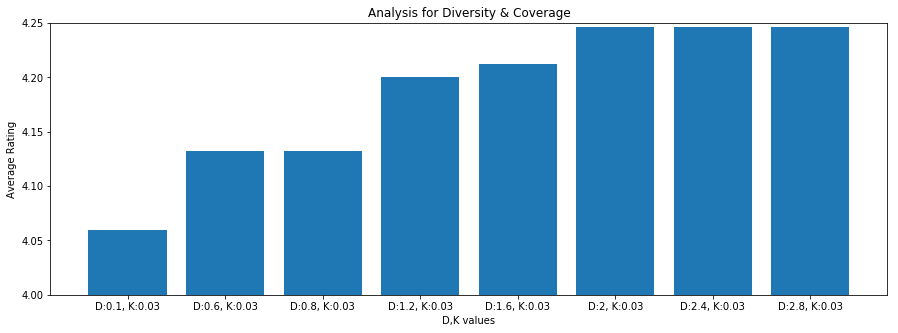

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.03",0.1,0.03,4.060
1,"D:0.6, K:0.03",0.6,0.03,4.132
2,"D:0.8, K:0.03",0.8,0.03,4.132
3,"D:1.2, K:0.03",1.2,0.03,4.200
4,"D:1.6, K:0.03",1.6,0.03,4.212
5,"D:2, K:0.03",2.0,0.03,4.246
6,"D:2.4, K:0.03",2.4,0.03,4.246
7,"D:2.8, K:0.03",2.8,0.03,4.246


In [46]:
K = [0.03]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,False,False)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.05
 Running for d : 0.6,  and k : 0.05
 Running for d : 0.8,  and k : 0.05
 Running for d : 1.2,  and k : 0.05
 Running for d : 1.6,  and k : 0.05
 Running for d : 2,  and k : 0.05
 Running for d : 2.4,  and k : 0.05
 Running for d : 2.8,  and k : 0.05


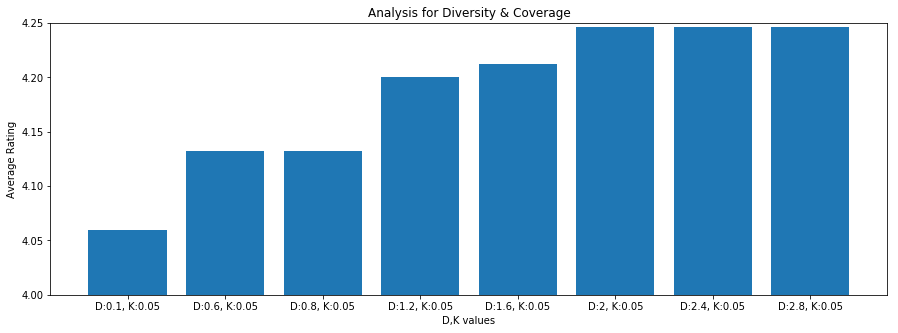

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.05",0.1,0.05,4.060
1,"D:0.6, K:0.05",0.6,0.05,4.132
2,"D:0.8, K:0.05",0.8,0.05,4.132
3,"D:1.2, K:0.05",1.2,0.05,4.200
4,"D:1.6, K:0.05",1.6,0.05,4.212
5,"D:2, K:0.05",2.0,0.05,4.246
6,"D:2.4, K:0.05",2.4,0.05,4.246
7,"D:2.8, K:0.05",2.8,0.05,4.246


In [47]:
K = [0.05]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,False,False)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.07
 Running for d : 0.6,  and k : 0.07
 Running for d : 0.8,  and k : 0.07
 Running for d : 1.2,  and k : 0.07
 Running for d : 1.6,  and k : 0.07
 Running for d : 2,  and k : 0.07
 Running for d : 2.4,  and k : 0.07
 Running for d : 2.8,  and k : 0.07


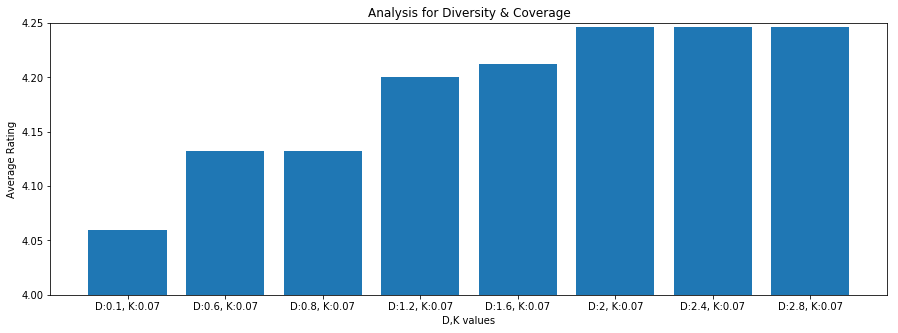

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.07",0.1,0.07,4.060
1,"D:0.6, K:0.07",0.6,0.07,4.132
2,"D:0.8, K:0.07",0.8,0.07,4.132
3,"D:1.2, K:0.07",1.2,0.07,4.200
4,"D:1.6, K:0.07",1.6,0.07,4.212
5,"D:2, K:0.07",2.0,0.07,4.246
6,"D:2.4, K:0.07",2.4,0.07,4.246
7,"D:2.8, K:0.07",2.8,0.07,4.246


In [48]:
K = [0.07]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,False,False)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.1
 Running for d : 0.6,  and k : 0.1
 Running for d : 0.8,  and k : 0.1
 Running for d : 1.2,  and k : 0.1
 Running for d : 1.6,  and k : 0.1
 Running for d : 2,  and k : 0.1
 Running for d : 2.4,  and k : 0.1
 Running for d : 2.8,  and k : 0.1


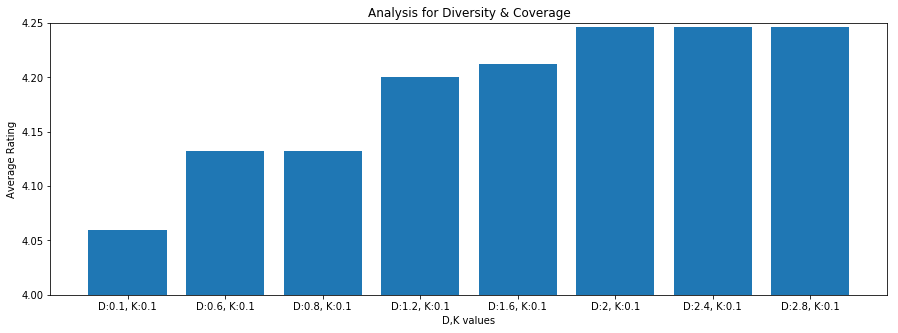

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.1",0.1,0.1,4.060
1,"D:0.6, K:0.1",0.6,0.1,4.132
2,"D:0.8, K:0.1",0.8,0.1,4.132
3,"D:1.2, K:0.1",1.2,0.1,4.200
4,"D:1.6, K:0.1",1.6,0.1,4.212
5,"D:2, K:0.1",2.0,0.1,4.246
6,"D:2.4, K:0.1",2.4,0.1,4.246
7,"D:2.8, K:0.1",2.8,0.1,4.246


In [49]:
K = [0.1]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,False,False)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.15
 Running for d : 0.6,  and k : 0.15
 Running for d : 0.8,  and k : 0.15
 Running for d : 1.2,  and k : 0.15
 Running for d : 1.6,  and k : 0.15
 Running for d : 2,  and k : 0.15
 Running for d : 2.4,  and k : 0.15
 Running for d : 2.8,  and k : 0.15


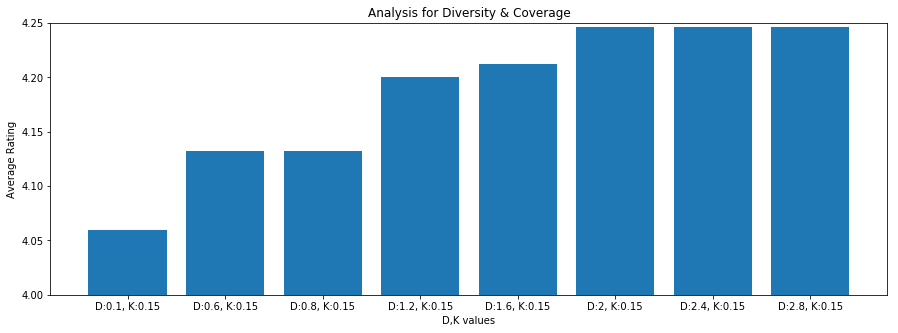

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.15",0.1,0.15,4.060
1,"D:0.6, K:0.15",0.6,0.15,4.132
2,"D:0.8, K:0.15",0.8,0.15,4.132
3,"D:1.2, K:0.15",1.2,0.15,4.200
4,"D:1.6, K:0.15",1.6,0.15,4.212
5,"D:2, K:0.15",2.0,0.15,4.246
6,"D:2.4, K:0.15",2.4,0.15,4.246
7,"D:2.8, K:0.15",2.8,0.15,4.246


In [50]:
K = [0.15]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,False,False)
plot_coverage(df251)
df251

### L=10, different D,K values , continuous values, default cvxpy solver

 Running for d : 0.1,  and k : 0.01
 Running for d : 0.6,  and k : 0.01
 Running for d : 0.8,  and k : 0.01
 Running for d : 1.2,  and k : 0.01
 Running for d : 1.6,  and k : 0.01
 Running for d : 2,  and k : 0.01
 Running for d : 2.4,  and k : 0.01
 Running for d : 2.8,  and k : 0.01


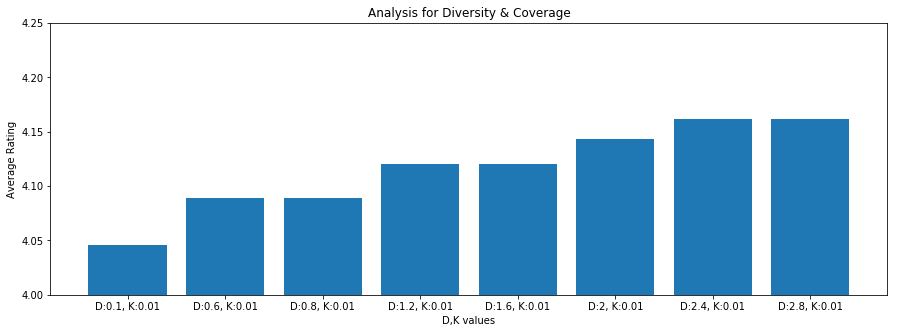

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.01",0.1,0.01,4.046
1,"D:0.6, K:0.01",0.6,0.01,4.089
2,"D:0.8, K:0.01",0.8,0.01,4.089
3,"D:1.2, K:0.01",1.2,0.01,4.120
4,"D:1.6, K:0.01",1.6,0.01,4.120
5,"D:2, K:0.01",2.0,0.01,4.143
6,"D:2.4, K:0.01",2.4,0.01,4.162
7,"D:2.8, K:0.01",2.8,0.01,4.162


In [51]:
K = [0.01]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,False,False)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.03
 Running for d : 0.6,  and k : 0.03
 Running for d : 0.8,  and k : 0.03
 Running for d : 1.2,  and k : 0.03
 Running for d : 1.6,  and k : 0.03
 Running for d : 2,  and k : 0.03
 Running for d : 2.4,  and k : 0.03
 Running for d : 2.8,  and k : 0.03


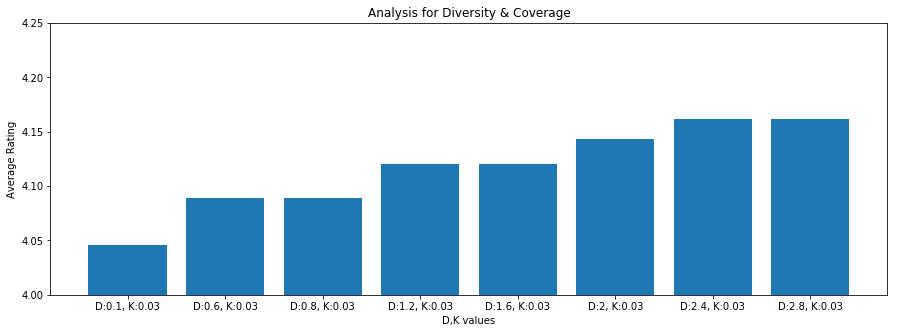

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.03",0.1,0.03,4.046
1,"D:0.6, K:0.03",0.6,0.03,4.089
2,"D:0.8, K:0.03",0.8,0.03,4.089
3,"D:1.2, K:0.03",1.2,0.03,4.120
4,"D:1.6, K:0.03",1.6,0.03,4.120
5,"D:2, K:0.03",2.0,0.03,4.143
6,"D:2.4, K:0.03",2.4,0.03,4.162
7,"D:2.8, K:0.03",2.8,0.03,4.162


In [52]:
K = [0.03]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,False,False)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.05
 Running for d : 0.6,  and k : 0.05
 Running for d : 0.8,  and k : 0.05
 Running for d : 1.2,  and k : 0.05
 Running for d : 1.6,  and k : 0.05
 Running for d : 2,  and k : 0.05
 Running for d : 2.4,  and k : 0.05
 Running for d : 2.8,  and k : 0.05


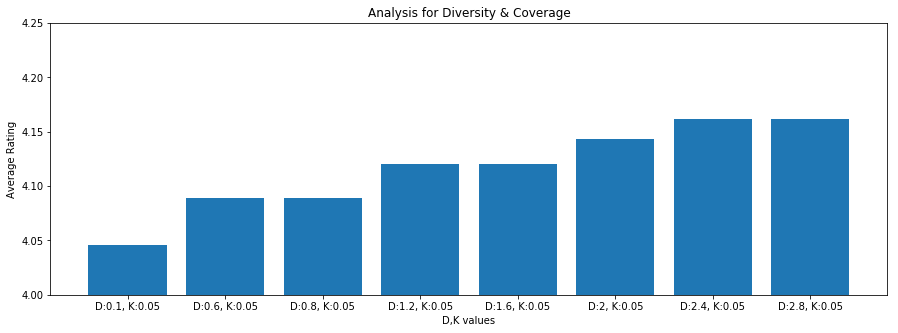

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.05",0.1,0.05,4.046
1,"D:0.6, K:0.05",0.6,0.05,4.089
2,"D:0.8, K:0.05",0.8,0.05,4.089
3,"D:1.2, K:0.05",1.2,0.05,4.120
4,"D:1.6, K:0.05",1.6,0.05,4.120
5,"D:2, K:0.05",2.0,0.05,4.143
6,"D:2.4, K:0.05",2.4,0.05,4.162
7,"D:2.8, K:0.05",2.8,0.05,4.162


In [53]:
K = [0.05]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,False,False)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.07
 Running for d : 0.6,  and k : 0.07
 Running for d : 0.8,  and k : 0.07
 Running for d : 1.2,  and k : 0.07
 Running for d : 1.6,  and k : 0.07
 Running for d : 2,  and k : 0.07
 Running for d : 2.4,  and k : 0.07
 Running for d : 2.8,  and k : 0.07


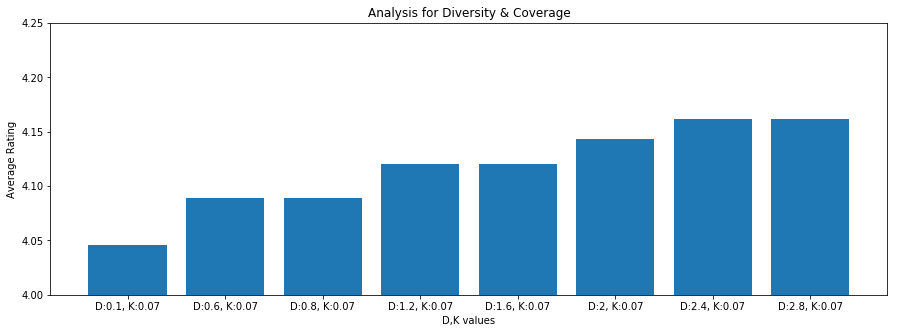

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.07",0.1,0.07,4.046
1,"D:0.6, K:0.07",0.6,0.07,4.089
2,"D:0.8, K:0.07",0.8,0.07,4.089
3,"D:1.2, K:0.07",1.2,0.07,4.120
4,"D:1.6, K:0.07",1.6,0.07,4.120
5,"D:2, K:0.07",2.0,0.07,4.143
6,"D:2.4, K:0.07",2.4,0.07,4.162
7,"D:2.8, K:0.07",2.8,0.07,4.162


In [54]:
K = [0.07]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,False,False)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.1
 Running for d : 0.6,  and k : 0.1
 Running for d : 0.8,  and k : 0.1
 Running for d : 1.2,  and k : 0.1
 Running for d : 1.6,  and k : 0.1
 Running for d : 2,  and k : 0.1
 Running for d : 2.4,  and k : 0.1
 Running for d : 2.8,  and k : 0.1


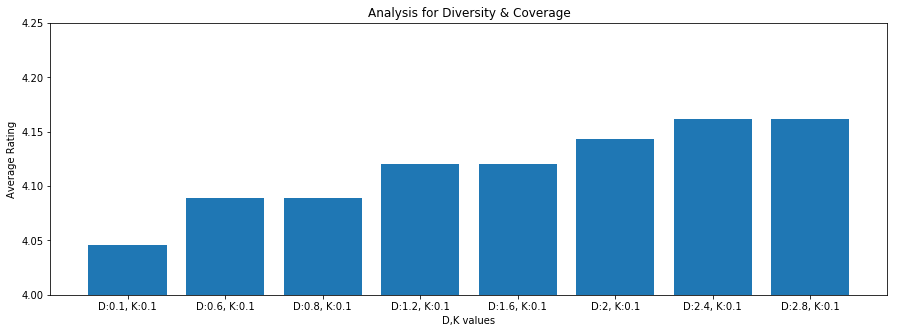

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.1",0.1,0.1,4.046
1,"D:0.6, K:0.1",0.6,0.1,4.089
2,"D:0.8, K:0.1",0.8,0.1,4.089
3,"D:1.2, K:0.1",1.2,0.1,4.120
4,"D:1.6, K:0.1",1.6,0.1,4.120
5,"D:2, K:0.1",2.0,0.1,4.143
6,"D:2.4, K:0.1",2.4,0.1,4.162
7,"D:2.8, K:0.1",2.8,0.1,4.162


In [55]:
K = [0.1]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,False,False)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.15
 Running for d : 0.6,  and k : 0.15
 Running for d : 0.8,  and k : 0.15
 Running for d : 1.2,  and k : 0.15
 Running for d : 1.6,  and k : 0.15
 Running for d : 2,  and k : 0.15
 Running for d : 2.4,  and k : 0.15
 Running for d : 2.8,  and k : 0.15


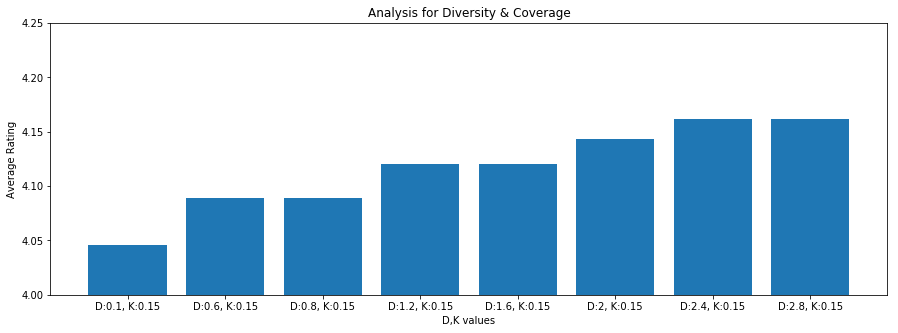

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.15",0.1,0.15,4.046
1,"D:0.6, K:0.15",0.6,0.15,4.089
2,"D:0.8, K:0.15",0.8,0.15,4.089
3,"D:1.2, K:0.15",1.2,0.15,4.120
4,"D:1.6, K:0.15",1.6,0.15,4.120
5,"D:2, K:0.15",2.0,0.15,4.143
6,"D:2.4, K:0.15",2.4,0.15,4.162
7,"D:2.8, K:0.15",2.8,0.15,4.162


In [56]:
K = [0.15]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,False,False)
plot_coverage(df251)
df251

### L=5, different D,K values , continuous values, Gurobi solver

 Running for d : 0.1,  and k : 0.01
 Running for d : 0.6,  and k : 0.01
 Running for d : 0.8,  and k : 0.01
 Running for d : 1.2,  and k : 0.01
 Running for d : 1.6,  and k : 0.01
 Running for d : 2,  and k : 0.01
 Running for d : 2.4,  and k : 0.01
 Running for d : 2.8,  and k : 0.01


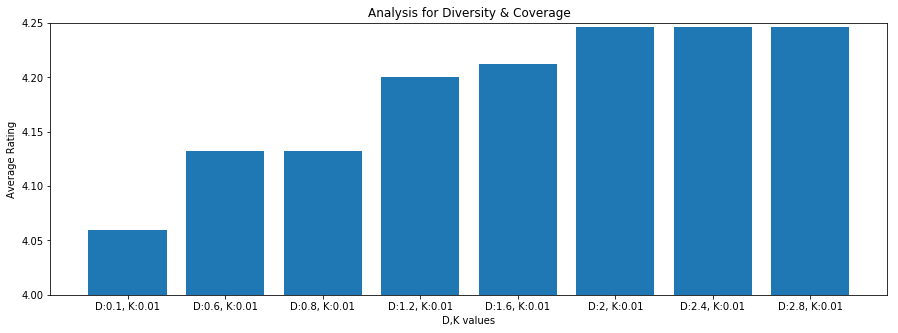

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.01",0.1,0.01,4.060
1,"D:0.6, K:0.01",0.6,0.01,4.132
2,"D:0.8, K:0.01",0.8,0.01,4.132
3,"D:1.2, K:0.01",1.2,0.01,4.200
4,"D:1.6, K:0.01",1.6,0.01,4.212
5,"D:2, K:0.01",2.0,0.01,4.246
6,"D:2.4, K:0.01",2.4,0.01,4.246
7,"D:2.8, K:0.01",2.8,0.01,4.246


In [57]:
K = [0.01]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,False,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.03
 Running for d : 0.6,  and k : 0.03
 Running for d : 0.8,  and k : 0.03
 Running for d : 1.2,  and k : 0.03
 Running for d : 1.6,  and k : 0.03
 Running for d : 2,  and k : 0.03
 Running for d : 2.4,  and k : 0.03
 Running for d : 2.8,  and k : 0.03


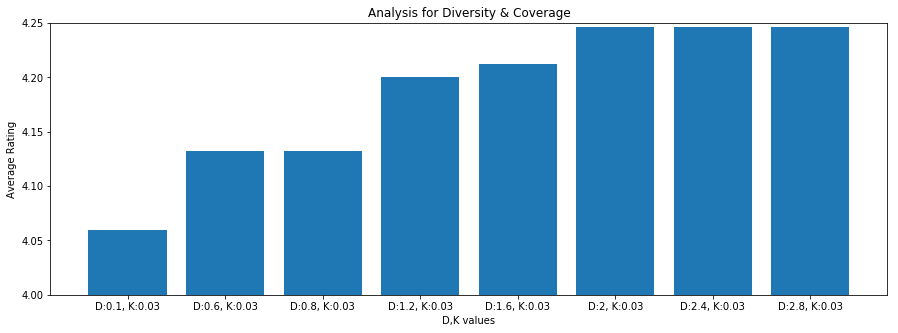

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.03",0.1,0.03,4.060
1,"D:0.6, K:0.03",0.6,0.03,4.132
2,"D:0.8, K:0.03",0.8,0.03,4.132
3,"D:1.2, K:0.03",1.2,0.03,4.200
4,"D:1.6, K:0.03",1.6,0.03,4.212
5,"D:2, K:0.03",2.0,0.03,4.246
6,"D:2.4, K:0.03",2.4,0.03,4.246
7,"D:2.8, K:0.03",2.8,0.03,4.246


In [58]:
K = [0.03]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,False,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.05
 Running for d : 0.6,  and k : 0.05
 Running for d : 0.8,  and k : 0.05
 Running for d : 1.2,  and k : 0.05
 Running for d : 1.6,  and k : 0.05
 Running for d : 2,  and k : 0.05
 Running for d : 2.4,  and k : 0.05
 Running for d : 2.8,  and k : 0.05


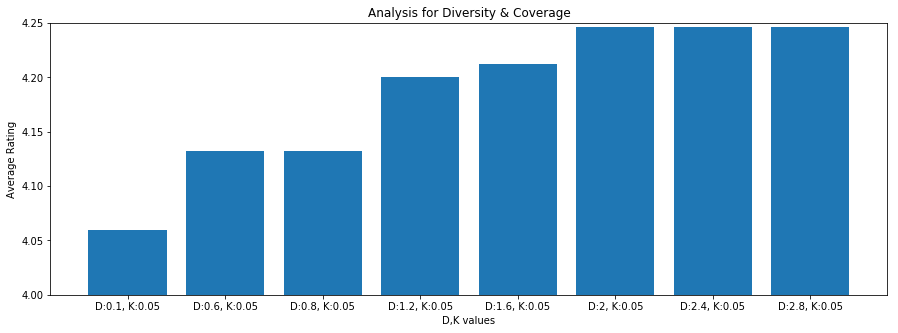

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.05",0.1,0.05,4.060
1,"D:0.6, K:0.05",0.6,0.05,4.132
2,"D:0.8, K:0.05",0.8,0.05,4.132
3,"D:1.2, K:0.05",1.2,0.05,4.200
4,"D:1.6, K:0.05",1.6,0.05,4.212
5,"D:2, K:0.05",2.0,0.05,4.246
6,"D:2.4, K:0.05",2.4,0.05,4.246
7,"D:2.8, K:0.05",2.8,0.05,4.246


In [59]:
K = [0.05]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,False,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.07
 Running for d : 0.6,  and k : 0.07
 Running for d : 0.8,  and k : 0.07
 Running for d : 1.2,  and k : 0.07
 Running for d : 1.6,  and k : 0.07
 Running for d : 2,  and k : 0.07
 Running for d : 2.4,  and k : 0.07
 Running for d : 2.8,  and k : 0.07


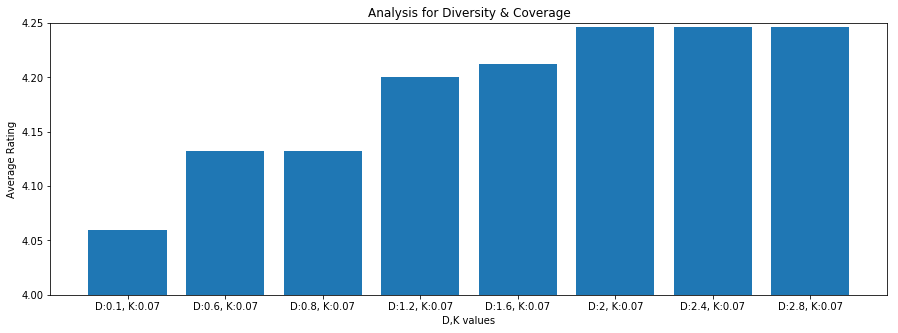

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.07",0.1,0.07,4.060
1,"D:0.6, K:0.07",0.6,0.07,4.132
2,"D:0.8, K:0.07",0.8,0.07,4.132
3,"D:1.2, K:0.07",1.2,0.07,4.200
4,"D:1.6, K:0.07",1.6,0.07,4.212
5,"D:2, K:0.07",2.0,0.07,4.246
6,"D:2.4, K:0.07",2.4,0.07,4.246
7,"D:2.8, K:0.07",2.8,0.07,4.246


In [60]:
K = [0.07]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,False,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.1
 Running for d : 0.6,  and k : 0.1
 Running for d : 0.8,  and k : 0.1
 Running for d : 1.2,  and k : 0.1
 Running for d : 1.6,  and k : 0.1
 Running for d : 2,  and k : 0.1
 Running for d : 2.4,  and k : 0.1
 Running for d : 2.8,  and k : 0.1


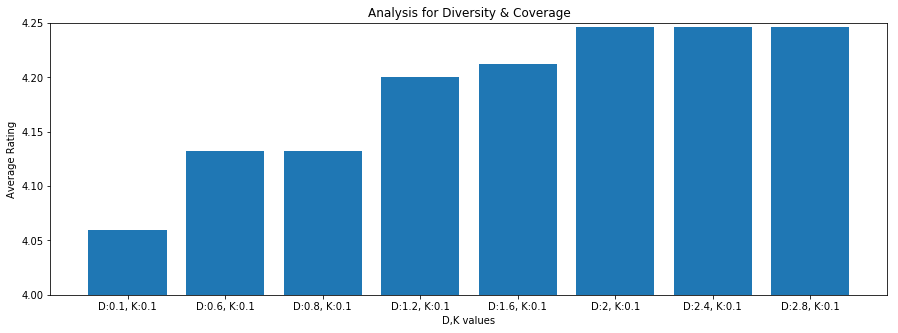

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.1",0.1,0.1,4.060
1,"D:0.6, K:0.1",0.6,0.1,4.132
2,"D:0.8, K:0.1",0.8,0.1,4.132
3,"D:1.2, K:0.1",1.2,0.1,4.200
4,"D:1.6, K:0.1",1.6,0.1,4.212
5,"D:2, K:0.1",2.0,0.1,4.246
6,"D:2.4, K:0.1",2.4,0.1,4.246
7,"D:2.8, K:0.1",2.8,0.1,4.246


In [61]:
K = [0.1]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,False,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.15
 Running for d : 0.6,  and k : 0.15
 Running for d : 0.8,  and k : 0.15
 Running for d : 1.2,  and k : 0.15
 Running for d : 1.6,  and k : 0.15
 Running for d : 2,  and k : 0.15
 Running for d : 2.4,  and k : 0.15
 Running for d : 2.8,  and k : 0.15


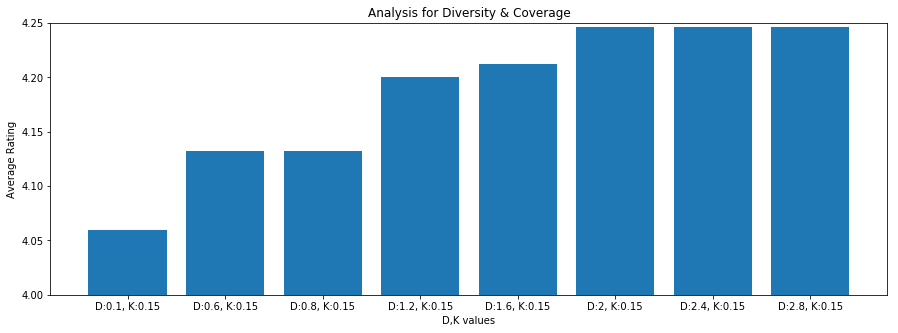

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.15",0.1,0.15,4.060
1,"D:0.6, K:0.15",0.6,0.15,4.132
2,"D:0.8, K:0.15",0.8,0.15,4.132
3,"D:1.2, K:0.15",1.2,0.15,4.200
4,"D:1.6, K:0.15",1.6,0.15,4.212
5,"D:2, K:0.15",2.0,0.15,4.246
6,"D:2.4, K:0.15",2.4,0.15,4.246
7,"D:2.8, K:0.15",2.8,0.15,4.246


In [62]:
K = [0.15]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,False,True)
plot_coverage(df251)
df251

### L=10, different D,K values , continuous values, Gurobi solver

 Running for d : 0.1,  and k : 0.01
 Running for d : 0.6,  and k : 0.01
 Running for d : 0.8,  and k : 0.01
 Running for d : 1.2,  and k : 0.01
 Running for d : 1.6,  and k : 0.01
 Running for d : 2,  and k : 0.01
 Running for d : 2.4,  and k : 0.01
 Running for d : 2.8,  and k : 0.01


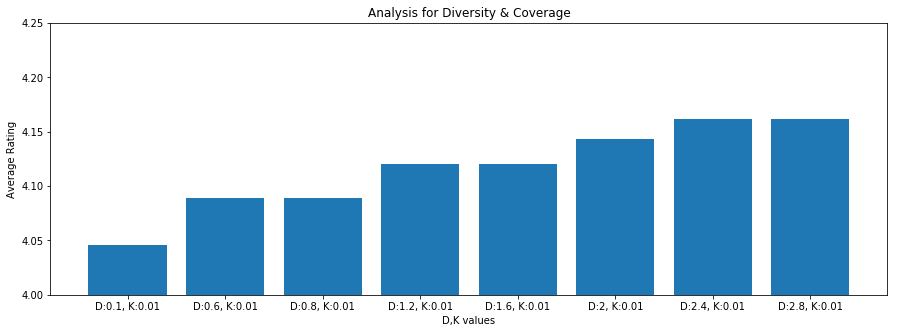

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.01",0.1,0.01,4.046
1,"D:0.6, K:0.01",0.6,0.01,4.089
2,"D:0.8, K:0.01",0.8,0.01,4.089
3,"D:1.2, K:0.01",1.2,0.01,4.120
4,"D:1.6, K:0.01",1.6,0.01,4.120
5,"D:2, K:0.01",2.0,0.01,4.143
6,"D:2.4, K:0.01",2.4,0.01,4.162
7,"D:2.8, K:0.01",2.8,0.01,4.162


In [63]:
K = [0.01]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,False,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.03
 Running for d : 0.6,  and k : 0.03
 Running for d : 0.8,  and k : 0.03
 Running for d : 1.2,  and k : 0.03
 Running for d : 1.6,  and k : 0.03
 Running for d : 2,  and k : 0.03
 Running for d : 2.4,  and k : 0.03
 Running for d : 2.8,  and k : 0.03


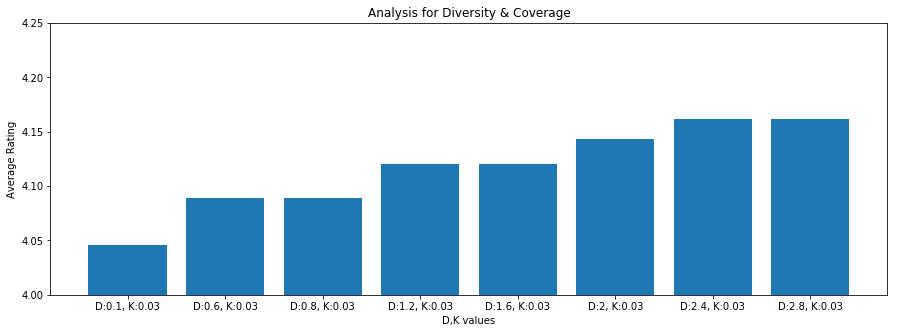

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.03",0.1,0.03,4.046
1,"D:0.6, K:0.03",0.6,0.03,4.089
2,"D:0.8, K:0.03",0.8,0.03,4.089
3,"D:1.2, K:0.03",1.2,0.03,4.120
4,"D:1.6, K:0.03",1.6,0.03,4.120
5,"D:2, K:0.03",2.0,0.03,4.143
6,"D:2.4, K:0.03",2.4,0.03,4.162
7,"D:2.8, K:0.03",2.8,0.03,4.162


In [64]:
K = [0.03]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,False,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.05
 Running for d : 0.6,  and k : 0.05
 Running for d : 0.8,  and k : 0.05
 Running for d : 1.2,  and k : 0.05
 Running for d : 1.6,  and k : 0.05
 Running for d : 2,  and k : 0.05
 Running for d : 2.4,  and k : 0.05
 Running for d : 2.8,  and k : 0.05


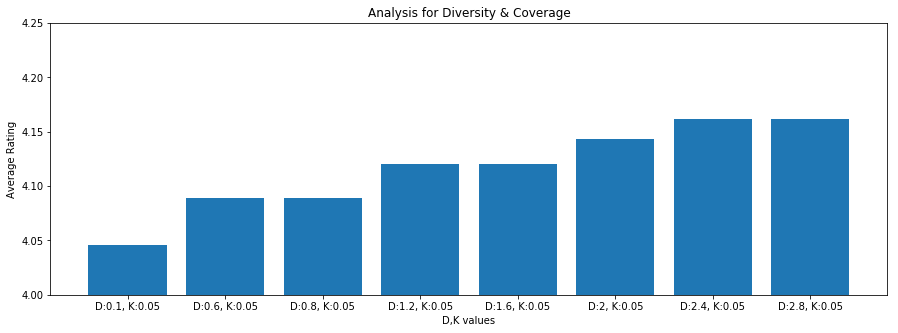

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.05",0.1,0.05,4.046
1,"D:0.6, K:0.05",0.6,0.05,4.089
2,"D:0.8, K:0.05",0.8,0.05,4.089
3,"D:1.2, K:0.05",1.2,0.05,4.120
4,"D:1.6, K:0.05",1.6,0.05,4.120
5,"D:2, K:0.05",2.0,0.05,4.143
6,"D:2.4, K:0.05",2.4,0.05,4.162
7,"D:2.8, K:0.05",2.8,0.05,4.162


In [65]:
K = [0.05]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,False,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.07
 Running for d : 0.6,  and k : 0.07
 Running for d : 0.8,  and k : 0.07
 Running for d : 1.2,  and k : 0.07
 Running for d : 1.6,  and k : 0.07
 Running for d : 2,  and k : 0.07
 Running for d : 2.4,  and k : 0.07
 Running for d : 2.8,  and k : 0.07


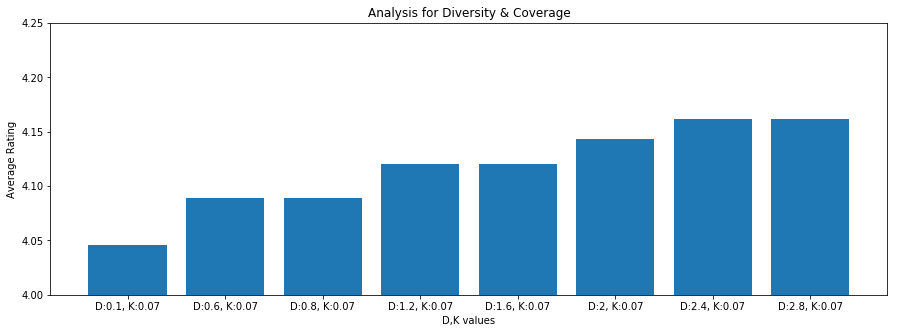

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.07",0.1,0.07,4.046
1,"D:0.6, K:0.07",0.6,0.07,4.089
2,"D:0.8, K:0.07",0.8,0.07,4.089
3,"D:1.2, K:0.07",1.2,0.07,4.120
4,"D:1.6, K:0.07",1.6,0.07,4.120
5,"D:2, K:0.07",2.0,0.07,4.143
6,"D:2.4, K:0.07",2.4,0.07,4.162
7,"D:2.8, K:0.07",2.8,0.07,4.162


In [66]:
K = [0.07]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,False,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.1
 Running for d : 0.6,  and k : 0.1
 Running for d : 0.8,  and k : 0.1
 Running for d : 1.2,  and k : 0.1
 Running for d : 1.6,  and k : 0.1
 Running for d : 2,  and k : 0.1
 Running for d : 2.4,  and k : 0.1
 Running for d : 2.8,  and k : 0.1


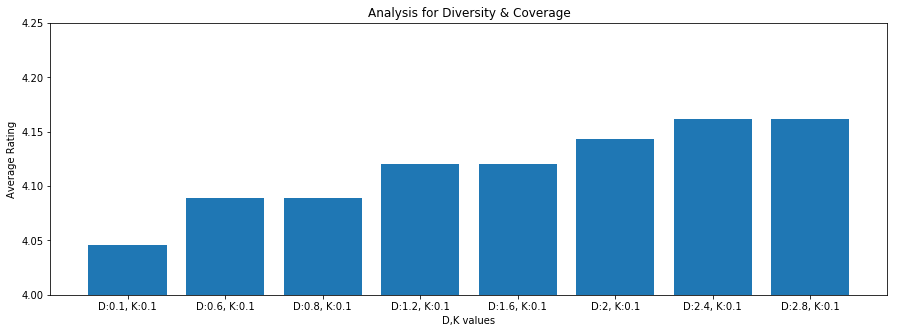

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.1",0.1,0.1,4.046
1,"D:0.6, K:0.1",0.6,0.1,4.089
2,"D:0.8, K:0.1",0.8,0.1,4.089
3,"D:1.2, K:0.1",1.2,0.1,4.120
4,"D:1.6, K:0.1",1.6,0.1,4.120
5,"D:2, K:0.1",2.0,0.1,4.143
6,"D:2.4, K:0.1",2.4,0.1,4.162
7,"D:2.8, K:0.1",2.8,0.1,4.162


In [67]:
K = [0.1]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,False,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.15
 Running for d : 0.6,  and k : 0.15
 Running for d : 0.8,  and k : 0.15
 Running for d : 1.2,  and k : 0.15
 Running for d : 1.6,  and k : 0.15
 Running for d : 2,  and k : 0.15
 Running for d : 2.4,  and k : 0.15
 Running for d : 2.8,  and k : 0.15


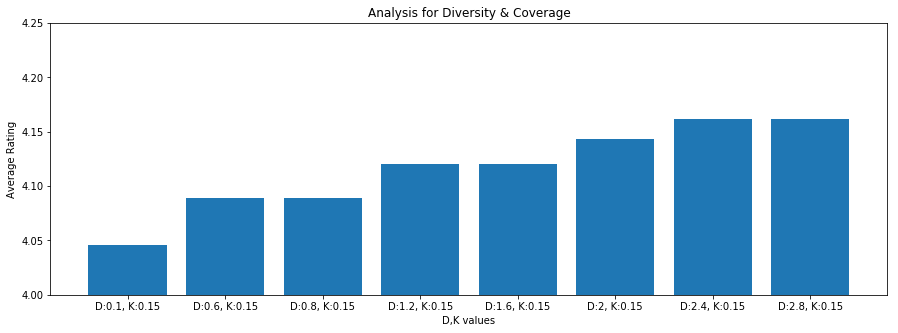

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.15",0.1,0.15,4.046
1,"D:0.6, K:0.15",0.6,0.15,4.089
2,"D:0.8, K:0.15",0.8,0.15,4.089
3,"D:1.2, K:0.15",1.2,0.15,4.120
4,"D:1.6, K:0.15",1.6,0.15,4.120
5,"D:2, K:0.15",2.0,0.15,4.143
6,"D:2.4, K:0.15",2.4,0.15,4.162
7,"D:2.8, K:0.15",2.8,0.15,4.162


In [68]:
K = [0.15]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,False,True)
plot_coverage(df251)
df251

### L=5, different D,K values , discrete values, Gurobi solver

 Running for d : 0.1,  and k : 0.01
 Running for d : 0.6,  and k : 0.01
 Running for d : 0.8,  and k : 0.01
 Running for d : 1.2,  and k : 0.01
 Running for d : 1.6,  and k : 0.01
 Running for d : 2,  and k : 0.01
 Running for d : 2.4,  and k : 0.01
 Running for d : 2.8,  and k : 0.01


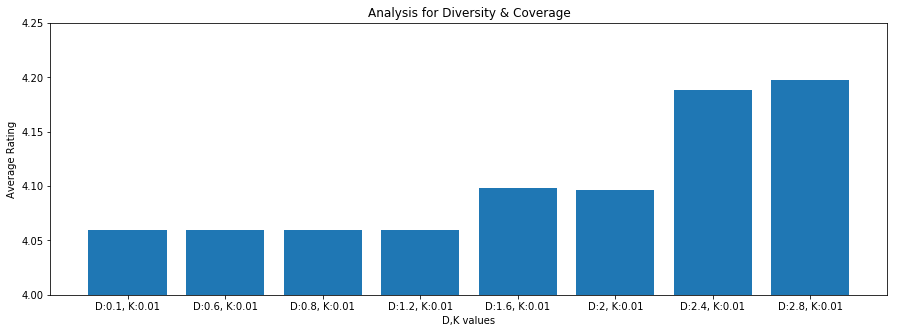

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.01",0.1,0.01,4.060
1,"D:0.6, K:0.01",0.6,0.01,4.060
2,"D:0.8, K:0.01",0.8,0.01,4.060
3,"D:1.2, K:0.01",1.2,0.01,4.060
4,"D:1.6, K:0.01",1.6,0.01,4.098
5,"D:2, K:0.01",2.0,0.01,4.096
6,"D:2.4, K:0.01",2.4,0.01,4.188
7,"D:2.8, K:0.01",2.8,0.01,4.198


In [69]:
K = [0.01]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,True,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.03
 Running for d : 0.6,  and k : 0.03
 Running for d : 0.8,  and k : 0.03
 Running for d : 1.2,  and k : 0.03
 Running for d : 1.6,  and k : 0.03
 Running for d : 2,  and k : 0.03
 Running for d : 2.4,  and k : 0.03
 Running for d : 2.8,  and k : 0.03


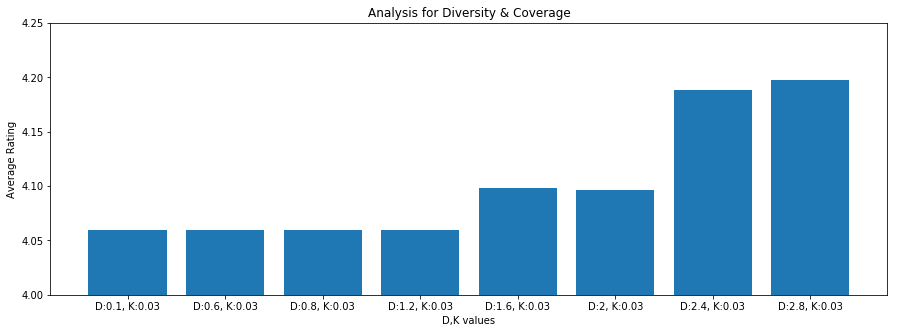

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.03",0.1,0.03,4.060
1,"D:0.6, K:0.03",0.6,0.03,4.060
2,"D:0.8, K:0.03",0.8,0.03,4.060
3,"D:1.2, K:0.03",1.2,0.03,4.060
4,"D:1.6, K:0.03",1.6,0.03,4.098
5,"D:2, K:0.03",2.0,0.03,4.096
6,"D:2.4, K:0.03",2.4,0.03,4.188
7,"D:2.8, K:0.03",2.8,0.03,4.198


In [70]:
K = [0.03]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,True,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.05
 Running for d : 0.6,  and k : 0.05
 Running for d : 0.8,  and k : 0.05
 Running for d : 1.2,  and k : 0.05
 Running for d : 1.6,  and k : 0.05
 Running for d : 2,  and k : 0.05
 Running for d : 2.4,  and k : 0.05
 Running for d : 2.8,  and k : 0.05


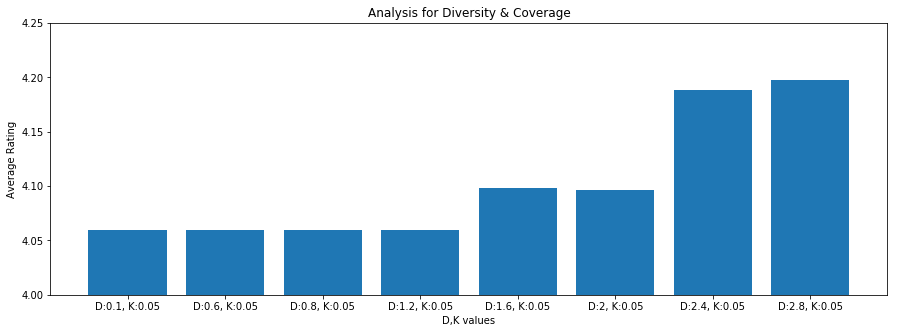

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.05",0.1,0.05,4.060
1,"D:0.6, K:0.05",0.6,0.05,4.060
2,"D:0.8, K:0.05",0.8,0.05,4.060
3,"D:1.2, K:0.05",1.2,0.05,4.060
4,"D:1.6, K:0.05",1.6,0.05,4.098
5,"D:2, K:0.05",2.0,0.05,4.096
6,"D:2.4, K:0.05",2.4,0.05,4.188
7,"D:2.8, K:0.05",2.8,0.05,4.198


In [71]:
K = [0.05]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,True,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.07
 Running for d : 0.6,  and k : 0.07
 Running for d : 0.8,  and k : 0.07
 Running for d : 1.2,  and k : 0.07
 Running for d : 1.6,  and k : 0.07
 Running for d : 2,  and k : 0.07
 Running for d : 2.4,  and k : 0.07
 Running for d : 2.8,  and k : 0.07


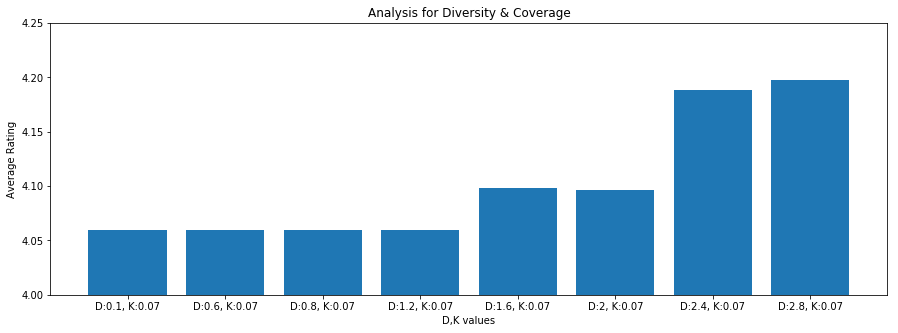

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.07",0.1,0.07,4.060
1,"D:0.6, K:0.07",0.6,0.07,4.060
2,"D:0.8, K:0.07",0.8,0.07,4.060
3,"D:1.2, K:0.07",1.2,0.07,4.060
4,"D:1.6, K:0.07",1.6,0.07,4.098
5,"D:2, K:0.07",2.0,0.07,4.096
6,"D:2.4, K:0.07",2.4,0.07,4.188
7,"D:2.8, K:0.07",2.8,0.07,4.198


In [72]:
K = [0.07]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,True,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.1
 Running for d : 0.6,  and k : 0.1
 Running for d : 0.8,  and k : 0.1
 Running for d : 1.2,  and k : 0.1
 Running for d : 1.6,  and k : 0.1
 Running for d : 2,  and k : 0.1
 Running for d : 2.4,  and k : 0.1
 Running for d : 2.8,  and k : 0.1


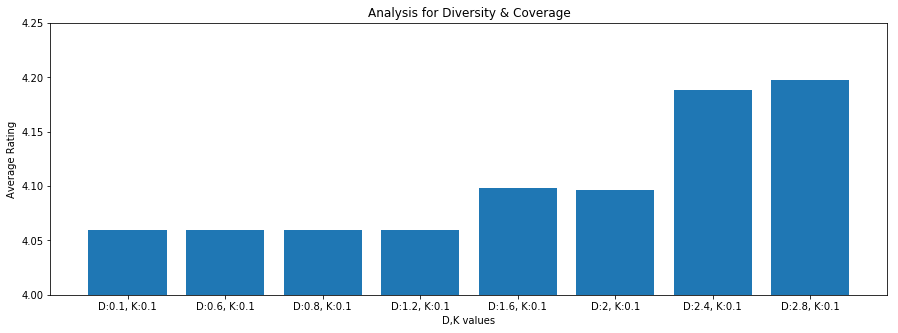

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.1",0.1,0.1,4.060
1,"D:0.6, K:0.1",0.6,0.1,4.060
2,"D:0.8, K:0.1",0.8,0.1,4.060
3,"D:1.2, K:0.1",1.2,0.1,4.060
4,"D:1.6, K:0.1",1.6,0.1,4.098
5,"D:2, K:0.1",2.0,0.1,4.096
6,"D:2.4, K:0.1",2.4,0.1,4.188
7,"D:2.8, K:0.1",2.8,0.1,4.198


In [73]:
K = [0.1]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,True,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.15
 Running for d : 0.6,  and k : 0.15
 Running for d : 0.8,  and k : 0.15
 Running for d : 1.2,  and k : 0.15
 Running for d : 1.6,  and k : 0.15
 Running for d : 2,  and k : 0.15
 Running for d : 2.4,  and k : 0.15
 Running for d : 2.8,  and k : 0.15


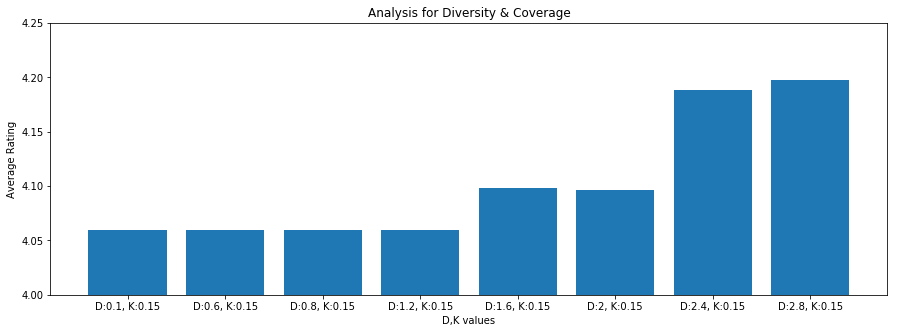

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.15",0.1,0.15,4.060
1,"D:0.6, K:0.15",0.6,0.15,4.060
2,"D:0.8, K:0.15",0.8,0.15,4.060
3,"D:1.2, K:0.15",1.2,0.15,4.060
4,"D:1.6, K:0.15",1.6,0.15,4.098
5,"D:2, K:0.15",2.0,0.15,4.096
6,"D:2.4, K:0.15",2.4,0.15,4.188
7,"D:2.8, K:0.15",2.8,0.15,4.198


In [74]:
K = [0.15]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,5,True,True)
plot_coverage(df251)
df251

### L=10, different D,K values , discrete values, Gurobi solver

 Running for d : 0.1,  and k : 0.01
 Running for d : 0.6,  and k : 0.01
 Running for d : 0.8,  and k : 0.01
 Running for d : 1.2,  and k : 0.01
 Running for d : 1.6,  and k : 0.01
 Running for d : 2,  and k : 0.01
 Running for d : 2.4,  and k : 0.01
 Running for d : 2.8,  and k : 0.01


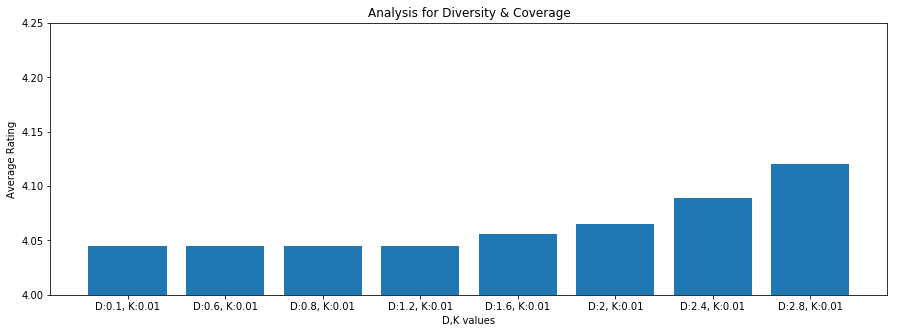

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.01",0.1,0.01,4.045
1,"D:0.6, K:0.01",0.6,0.01,4.045
2,"D:0.8, K:0.01",0.8,0.01,4.045
3,"D:1.2, K:0.01",1.2,0.01,4.045
4,"D:1.6, K:0.01",1.6,0.01,4.056
5,"D:2, K:0.01",2.0,0.01,4.065
6,"D:2.4, K:0.01",2.4,0.01,4.089
7,"D:2.8, K:0.01",2.8,0.01,4.120


In [75]:
K = [0.01]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,True,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.03
 Running for d : 0.6,  and k : 0.03
 Running for d : 0.8,  and k : 0.03
 Running for d : 1.2,  and k : 0.03
 Running for d : 1.6,  and k : 0.03
 Running for d : 2,  and k : 0.03
 Running for d : 2.4,  and k : 0.03
 Running for d : 2.8,  and k : 0.03


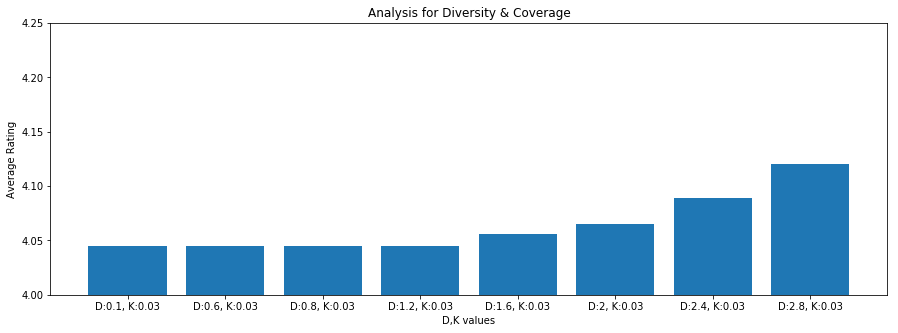

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.03",0.1,0.03,4.045
1,"D:0.6, K:0.03",0.6,0.03,4.045
2,"D:0.8, K:0.03",0.8,0.03,4.045
3,"D:1.2, K:0.03",1.2,0.03,4.045
4,"D:1.6, K:0.03",1.6,0.03,4.056
5,"D:2, K:0.03",2.0,0.03,4.065
6,"D:2.4, K:0.03",2.4,0.03,4.089
7,"D:2.8, K:0.03",2.8,0.03,4.120


In [76]:
K = [0.03]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,True,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.05
 Running for d : 0.6,  and k : 0.05
 Running for d : 0.8,  and k : 0.05
 Running for d : 1.2,  and k : 0.05
 Running for d : 1.6,  and k : 0.05
 Running for d : 2,  and k : 0.05
 Running for d : 2.4,  and k : 0.05
 Running for d : 2.8,  and k : 0.05


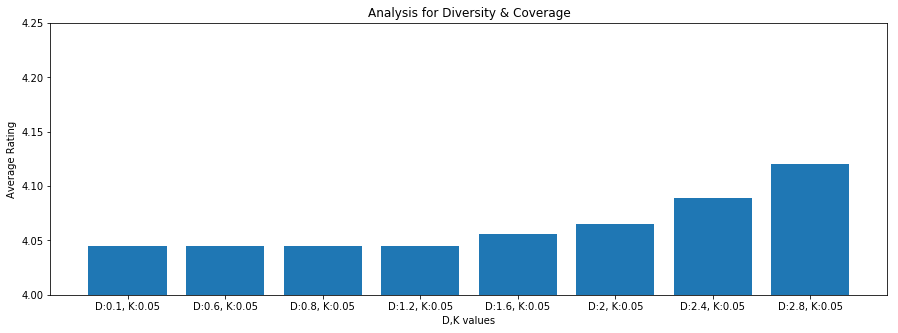

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.05",0.1,0.05,4.045
1,"D:0.6, K:0.05",0.6,0.05,4.045
2,"D:0.8, K:0.05",0.8,0.05,4.045
3,"D:1.2, K:0.05",1.2,0.05,4.045
4,"D:1.6, K:0.05",1.6,0.05,4.056
5,"D:2, K:0.05",2.0,0.05,4.065
6,"D:2.4, K:0.05",2.4,0.05,4.089
7,"D:2.8, K:0.05",2.8,0.05,4.120


In [77]:
K = [0.05]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,True,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.07
 Running for d : 0.6,  and k : 0.07
 Running for d : 0.8,  and k : 0.07
 Running for d : 1.2,  and k : 0.07
 Running for d : 1.6,  and k : 0.07
 Running for d : 2,  and k : 0.07
 Running for d : 2.4,  and k : 0.07
 Running for d : 2.8,  and k : 0.07


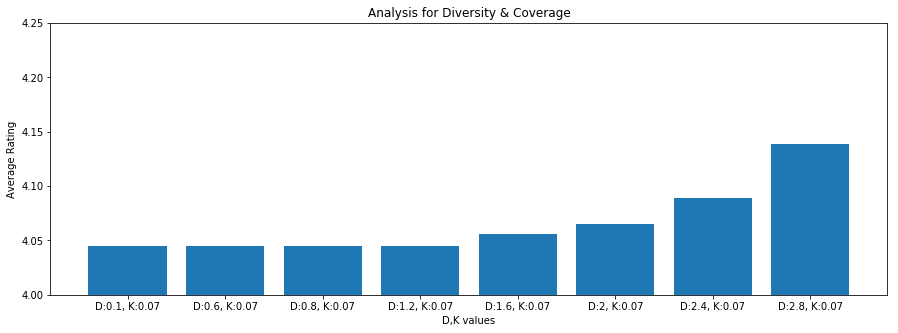

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.07",0.1,0.07,4.045
1,"D:0.6, K:0.07",0.6,0.07,4.045
2,"D:0.8, K:0.07",0.8,0.07,4.045
3,"D:1.2, K:0.07",1.2,0.07,4.045
4,"D:1.6, K:0.07",1.6,0.07,4.056
5,"D:2, K:0.07",2.0,0.07,4.065
6,"D:2.4, K:0.07",2.4,0.07,4.089
7,"D:2.8, K:0.07",2.8,0.07,4.139


In [78]:
K = [0.07]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,True,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.1
 Running for d : 0.6,  and k : 0.1
 Running for d : 0.8,  and k : 0.1
 Running for d : 1.2,  and k : 0.1
 Running for d : 1.6,  and k : 0.1
 Running for d : 2,  and k : 0.1
 Running for d : 2.4,  and k : 0.1
 Running for d : 2.8,  and k : 0.1


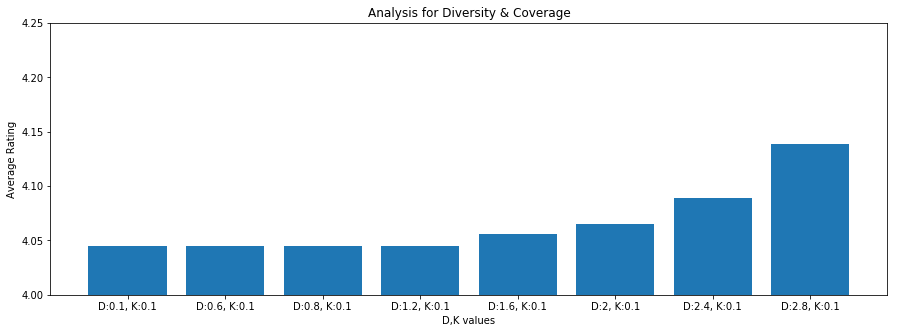

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.1",0.1,0.1,4.045
1,"D:0.6, K:0.1",0.6,0.1,4.045
2,"D:0.8, K:0.1",0.8,0.1,4.045
3,"D:1.2, K:0.1",1.2,0.1,4.045
4,"D:1.6, K:0.1",1.6,0.1,4.056
5,"D:2, K:0.1",2.0,0.1,4.065
6,"D:2.4, K:0.1",2.4,0.1,4.089
7,"D:2.8, K:0.1",2.8,0.1,4.139


In [79]:
K = [0.1]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,True,True)
plot_coverage(df251)
df251

 Running for d : 0.1,  and k : 0.15
 Running for d : 0.6,  and k : 0.15
 Running for d : 0.8,  and k : 0.15
 Running for d : 1.2,  and k : 0.15
 Running for d : 1.6,  and k : 0.15
 Running for d : 2,  and k : 0.15
 Running for d : 2.4,  and k : 0.15
 Running for d : 2.8,  and k : 0.15


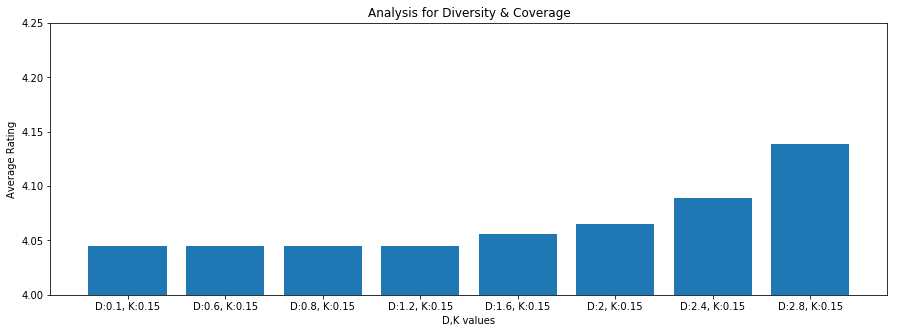

,D_K,D,K,Average_Rating
0,"D:0.1, K:0.15",0.1,0.15,4.045
1,"D:0.6, K:0.15",0.6,0.15,4.045
2,"D:0.8, K:0.15",0.8,0.15,4.045
3,"D:1.2, K:0.15",1.2,0.15,4.045
4,"D:1.6, K:0.15",1.6,0.15,4.056
5,"D:2, K:0.15",2.0,0.15,4.065
6,"D:2.4, K:0.15",2.4,0.15,4.089
7,"D:2.8, K:0.15",2.8,0.15,4.139


In [80]:
K = [0.15]
df251 =calculateForAnyK(D,K,rec_matrix_copy2,10,True,True)
plot_coverage(df251)
df251